# SFO Crime Classification

##Police Department Incident Reports: Historical 2003 to May 2018

SF OpenData - an open data catalog of San Francisco has provided 12 years of crime data dated from 2003 to 2018. These criminal records are mostly the incidents derived from SFPD Crime Incident Reporting System. They have published this dataset on Kaggle.


###Reference:

1. https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry

2. https://www.kaggle.com/code/flafuji/sf-crime-eda-visualization-model-explained

3. https://github.com/joshlingy/SF-crime-data-analysis-and-modeling/blob/master/SF%20crime%20data%20analysis%20and%20modeling.ipynb

4. https://www.kaggle.com/code/klyushnik/san-francisco-crimes-catboostclassifier

5. https://towardsdatascience.com/deep-dive-into-sf-crime-cb8f5870a9f6

6. https://www.kaggle.com/code/abhishekr7/time-series-forecasting-on-crimes-in-boston

7. https://jovian.com/msameeruddin/00-cs1-eda-mv-tsa-bow-tfidf-final#C159

8. https://www.analyticsvidhya.com/blog/2021/07/performing-multi-class-classification-on-fifa-dataset-using-keras/

9. https://github.com/marcellusruben/sf-crime-voila

10. https://www.dominodatalab.com/blog/creating-interactive-crime-maps-with-folium

In [1]:
# This piece of code enables display of multiple output from one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import warnings
warnings.filterwarnings('ignore')

Install Geopandas for the MAP Visualization

In [3]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 69.6 MB/s eta 0:00:00


### Import Libraries

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

In [5]:
from pandas.plotting import autocorrelation_plot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [6]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [7]:
%cd ./gdrive/Shareddrives/'ISE 244'/Dataset

/content/gdrive/Shareddrives/ISE 244/Dataset


## Data Overview

The dataset has 19 columns and the target attribute is Incident category

Link : https://data.sfgov.org/browse

In [8]:
df_2003_2018 = pd.read_csv("Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv") 

## Mapping the data to address as part of AI Problem

Standardize the columns that can be mapped to similar dataset of 2018 to present 

In [9]:
df_2003_2018_req = pd.DataFrame()
df_2003_2018_req["Incident_Datetime"] = pd.to_datetime(df_2003_2018["Date"].apply(str)+' '+df_2003_2018["Time"])
df_2003_2018_req["Report_Datetime"] = pd.to_datetime(df_2003_2018["Date"].apply(str)+' '+df_2003_2018["Time"])
df_2003_2018_req["Report Type Code"] = "NA"
df_2003_2018_req["Report Type Description"] = "NA"
df_2003_2018_req["Filed Online"] = "NA"
df_2003_2018_req["Incident_Date"] = df_2003_2018["Date"]
df_2003_2018_req["Incident_Time"] = df_2003_2018["Time"]
df_2003_2018_req["DayOfWeek"] = df_2003_2018["DayOfWeek"]
df_2003_2018_req["Incident_Num"] = df_2003_2018["IncidntNum"]
df_2003_2018_req["Incident_Code"] = df_2003_2018["Incident Code"]
df_2003_2018_req["Incident_Cat"] = df_2003_2018["Category"].astype(str).str.upper()
df_2003_2018_req["Incident_Desc"] = df_2003_2018["Descript"]
df_2003_2018_req["Incident Subcategory"] = "NA"
df_2003_2018_req["Address"] = df_2003_2018["Address"]
df_2003_2018_req["Police_Dist"] = df_2003_2018["PdDistrict"]
df_2003_2018_req["Resolution"] = df_2003_2018["Resolution"]
df_2003_2018_req["Analysis_Neigh"] = df_2003_2018["Analysis Neighborhoods 2 2"]
df_2003_2018_req["Neighborhoods"] = df_2003_2018["Neighborhoods 2"]
df_2003_2018_req["Central_Mar_Ten_Boun"] = df_2003_2018["Central Market/Tenderloin Boundary Polygon - Updated 2 2"]
df_2003_2018_req["Civic_Cen_Har_Red"] = df_2003_2018["Civic Center Harm Reduction Project Boundary 2 2"]
df_2003_2018_req["Cur_Pol_Dist"] = df_2003_2018["Current Police Districts 2 2"]
df_2003_2018_req["Cur_Sup_Dist"] = df_2003_2018["Current Supervisor Districts 2 2"]
df_2003_2018_req["HSOC_Zones"] = df_2003_2018["HSOC Zones as of 2018-06-05 2 2"]
df_2003_2018_req["Longitude"] = df_2003_2018["X"]
df_2003_2018_req["Latitude"] = df_2003_2018["Y"]

Address the null values of the mapped columns

In [10]:
df_2003_2018_req.loc[:, "Analysis_Neigh"] = df_2003_2018_req.loc[:, "Analysis_Neigh"].fillna(0)
df_2003_2018_req.loc[:, "Neighborhoods"] = df_2003_2018_req.loc[:, "Neighborhoods"].fillna(0)
df_2003_2018_req.loc[:, "Central_Mar_Ten_Boun"] = df_2003_2018_req.loc[:, "Central_Mar_Ten_Boun"].fillna(0)
df_2003_2018_req.loc[:, "Civic_Cen_Har_Red"] = df_2003_2018_req.loc[:, "Civic_Cen_Har_Red"].fillna(0)
df_2003_2018_req.loc[:, "Cur_Pol_Dist"] = df_2003_2018_req.loc[:, "Cur_Pol_Dist"].fillna(0)
df_2003_2018_req.loc[:, "Cur_Sup_Dist"] = df_2003_2018_req.loc[:, "Cur_Sup_Dist"].fillna(0)
df_2003_2018_req.loc[:, "HSOC_Zones"] = df_2003_2018_req.loc[:, "HSOC_Zones"].fillna(0)

Verification for nulls

In [11]:
df_2003_2018_req.isnull().sum()

Incident_Datetime          0
Report_Datetime            0
Report Type Code           0
Report Type Description    0
Filed Online               0
Incident_Date              0
Incident_Time              0
DayOfWeek                  0
Incident_Num               0
Incident_Code              0
Incident_Cat               0
Incident_Desc              0
Incident Subcategory       0
Address                    0
Police_Dist                0
Resolution                 0
Analysis_Neigh             0
Neighborhoods              0
Central_Mar_Ten_Boun       0
Civic_Cen_Har_Red          0
Cur_Pol_Dist               0
Cur_Sup_Dist               0
HSOC_Zones                 0
Longitude                  0
Latitude                   0
dtype: int64

Sample data

In [12]:
df_2003_2018_req.head()

Incident_Datetime     Report_Datetime Report Type Code  \
0 2004-11-22 17:50:00 2004-11-22 17:50:00               NA   
1 2005-10-18 20:00:00 2005-10-18 20:00:00               NA   
2 2004-02-15 02:00:00 2004-02-15 02:00:00               NA   
3 2011-02-18 05:27:00 2011-02-18 05:27:00               NA   
4 2010-11-21 17:00:00 2010-11-21 17:00:00               NA   

  Report Type Description Filed Online Incident_Date Incident_Time DayOfWeek  \
0                      NA           NA    2004-11-22      17:50:00    Monday   
1                      NA           NA    2005-10-18      20:00:00   Tuesday   
2                      NA           NA    2004-02-15       2:00:00    Sunday   
3                      NA           NA    2011-02-18       5:27:00    Friday   
4                      NA           NA    2010-11-21      17:00:00    Sunday   

   Incident_Num  Incident_Code  ... Resolution Analysis_Neigh Neighborhoods  \
0      41334220           3074  ...       NONE            0.0           0.0   
1      51185358           7021  ...       NONE            0.0           0.0   
2      40188309           7021  ...       NONE            0.0           0.0   
3     110145431          26030  ...       NONE           28.0          94.0   
4     101081080           4134  ...       NONE           34.0          32.0   

  Central_Mar_Ten_Boun Civic_Cen_Har_Red Cur_Pol_Dist  Cur_Sup_Dist  \
0                  0.0               0.0          0.0           9.0   
1                  0.0               0.0          0.0           0.0   
2                  0.0               0.0          0.0           0.0   
3                  0.0               0.0          9.0           1.0   
4                  0.0               0.0          1.0          10.0   

   HSOC_Zones   Longitude   Latitude  
0         0.0 -122.420084  37.708311  
1         0.0 -120.500000  90.000000  
2         0.0 -120.500000  90.000000  
3         0.0 -122.436220  37.724377  
4         0.0 -122.410541  37.770913  

[5 rows x 25 columns]

## Time Manupulation

Function to create the new feature Year, Month, day, Hour, Week_of_year, TimeOfDay and SeasonOfYear

In [13]:
def time_engineer(data):
    '''
    Extract temporal features from dates.
    '''
    # Turn strings into timestamp objects
    data.Incident_Datetime = pd.to_datetime(data.Incident_Datetime)

    # Extract years, months, times of the day, and weeks of year
    data['Year'] = data['Incident_Datetime'].dt.year
    data['Month'] = data['Incident_Datetime'].dt.month
    data['Day'] = data['Incident_Datetime'].dt.day
    data['Hour'] = data['Incident_Datetime'].dt.hour
    data['Week_Of_Year'] = data['Incident_Datetime'].dt.weekofyear


    # Add times of a day as String
    data.loc[(data['Hour']< 6) & (data['Hour']>=0),'TimeOfDay'] = 'Night'
    data.loc[(data['Hour']>=6) & (data['Hour']<12),'TimeOfDay'] = 'Morning'
    data.loc[(data['Hour']>=12) & (data['Hour']<18),'TimeOfDay'] = 'Afternoon'
    data.loc[(data['Hour']>=18) & (data['Hour']<24),'TimeOfDay'] = 'Evening'
    
    # Add seasons as String
    data.loc[(data['Month']>=3) & (data['Month']<6),'SeasonOfYear'] = 'Spring'
    data.loc[(data['Month']>=6) & (data['Month']<9),'SeasonOfYear'] = 'Summer'
    data.loc[(data['Month']>=9) & (data['Month']<12),'SeasonOfYear'] = 'Autumn'
    data.loc[(data['Month']<=2) | (data['Month']==12),'SeasonOfYear'] = 'Winter'
       
    return data

In [14]:
time_engineer(df_2003_2018_req)

Incident_Datetime     Report_Datetime Report Type Code  \
0       2004-11-22 17:50:00 2004-11-22 17:50:00               NA   
1       2005-10-18 20:00:00 2005-10-18 20:00:00               NA   
2       2004-02-15 02:00:00 2004-02-15 02:00:00               NA   
3       2011-02-18 05:27:00 2011-02-18 05:27:00               NA   
4       2010-11-21 17:00:00 2010-11-21 17:00:00               NA   
...                     ...                 ...              ...   
1048570 2008-07-11 22:00:00 2008-07-11 22:00:00               NA   
1048571 2013-01-11 19:24:00 2013-01-11 19:24:00               NA   
1048572 2008-01-25 15:00:00 2008-01-25 15:00:00               NA   
1048573 2005-03-07 00:45:00 2005-03-07 00:45:00               NA   
1048574 2007-05-27 13:00:00 2007-05-27 13:00:00               NA   

        Report Type Description Filed Online Incident_Date Incident_Time  \
0                            NA           NA    2004-11-22      17:50:00   
1                            NA           NA    2005-10-18      20:00:00   
2                            NA           NA    2004-02-15       2:00:00   
3                            NA           NA    2011-02-18       5:27:00   
4                            NA           NA    2010-11-21      17:00:00   
...                         ...          ...           ...           ...   
1048570                      NA           NA    2008-07-11      22:00:00   
1048571                      NA           NA    2013-01-11      19:24:00   
1048572                      NA           NA    2008-01-25      15:00:00   
1048573                      NA           NA    2005-03-07       0:45:00   
1048574                      NA           NA    2007-05-27      13:00:00   

        DayOfWeek  Incident_Num  Incident_Code  ... HSOC_Zones   Longitude  \
0          Monday      41334220           3074  ...        0.0 -122.420084   
1         Tuesday      51185358           7021  ...        0.0 -120.500000   
2          Sunday      40188309           7021  ...        0.0 -120.500000   
3          Friday     110145431          26030  ...        0.0 -122.436220   
4          Sunday     101081080           4134  ...        0.0 -122.410541   
...           ...           ...            ...  ...        ...         ...   
1048570    Friday      86050908          71000  ...        2.0 -122.406668   
1048571    Friday     130030931          62050  ...        1.0 -122.413870   
1048572    Friday      80095714           5043  ...        0.0 -122.430087   
1048573    Monday      50256532          72000  ...        0.0 -122.420526   
1048574    Sunday      70547123           6151  ...        0.0 -122.447335   

          Latitude  Year Month Day  Hour  Week_Of_Year  TimeOfDay  \
0        37.708311  2004    11  22    17            48  Afternoon   
1        90.000000  2005    10  18    20            42    Evening   
2        90.000000  2004     2  15     2             7      Night   
3        37.724377  2011     2  18     5             7      Night   
4        37.770913  2010    11  21    17            46  Afternoon   
...            ...   ...   ...  ..   ...           ...        ...   
1048570  37.767770  2008     7  11    22            28    Evening   
1048571  37.781862  2013     1  11    19             2    Evening   
1048572  37.745957  2008     1  25    15             4  Afternoon   
1048573  37.744725  2005     3   7     0            10      Night   
1048574  37.782487  2007     5  27    13            21  Afternoon   

         SeasonOfYear  
0              Autumn  
1              Autumn  
2              Winter  
3              Winter  
4              Autumn  
...               ...  
1048570        Summer  
1048571        Winter  
1048572        Winter  
1048573        Spring  
1048574        Spring  

[1048575 rows x 32 columns]

# This is For the dataset from 2003 to 2018

Filter and exclude the invalid/not better fit values

In [15]:
data = df_2003_2018_req[df_2003_2018_req["Latitude"] != 90 ]

##Exploratory Data Analysis

### Data Visualization

Visualize the data for DayOfWeek, Police Distict, Resolution and Incident category

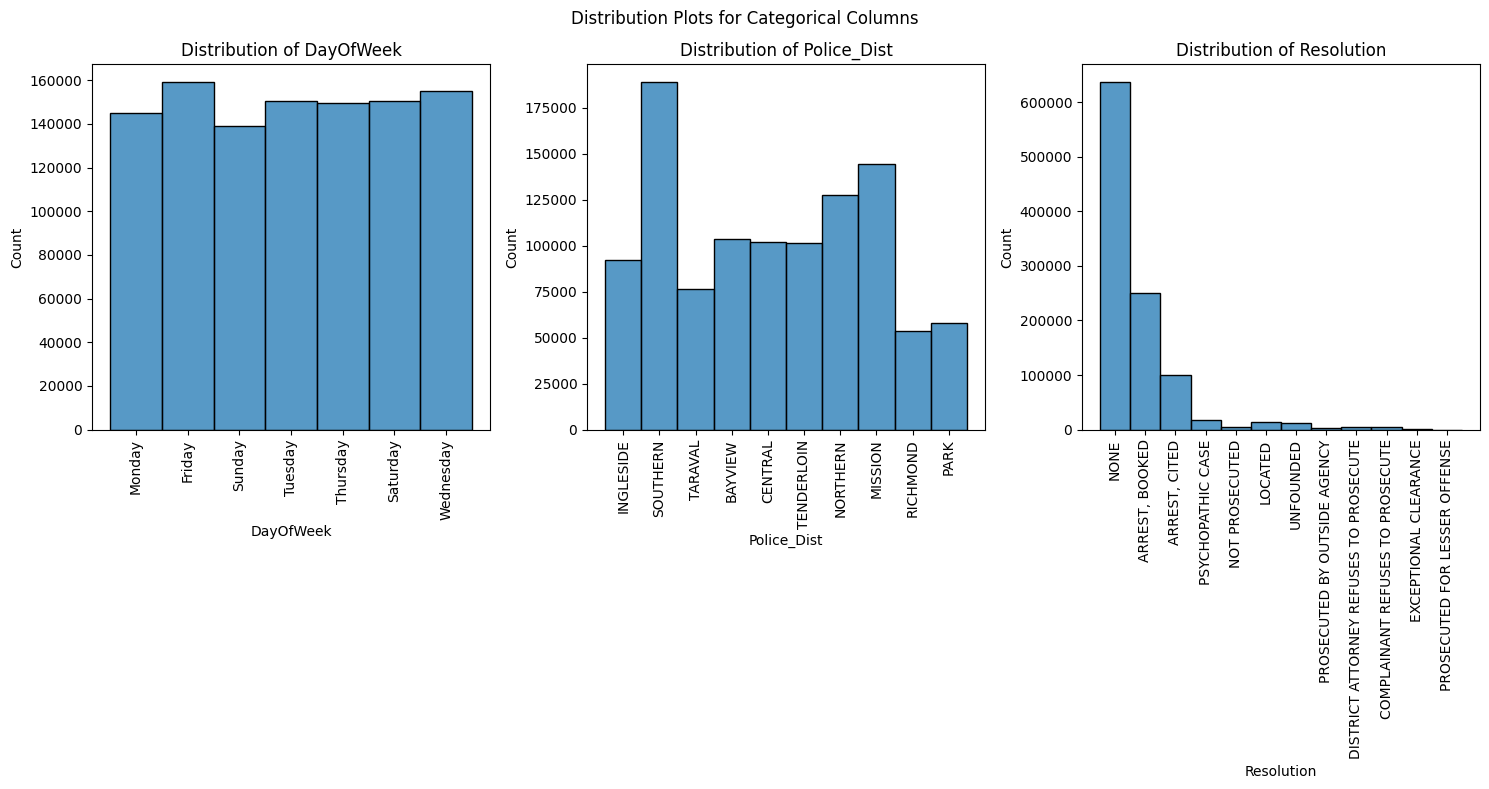

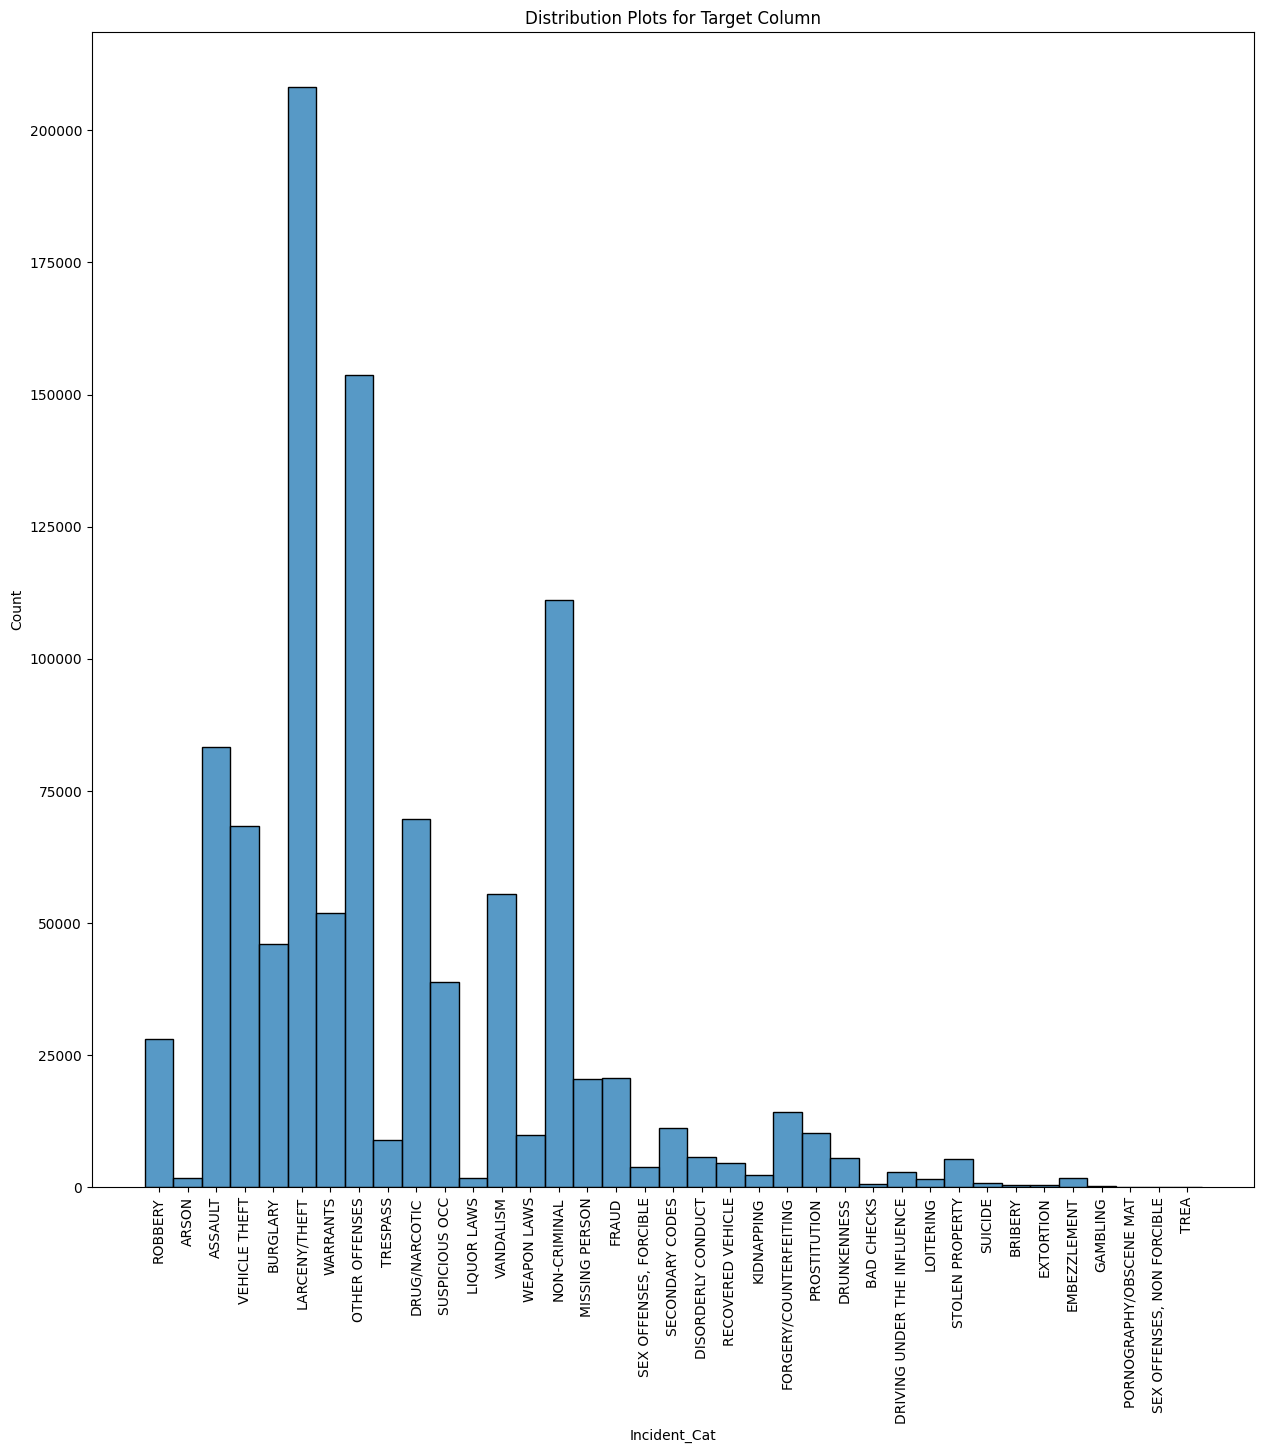

In [16]:
# categorical columns
categorical_columns_for_visualization = ['DayOfWeek', 'Police_Dist','Resolution']
fig, axes = plt.subplots(1, 3, figsize=(15, 8))
fig.suptitle('Distribution Plots for Categorical Columns')
axes = axes.ravel()
for index,col in enumerate(categorical_columns_for_visualization): 
    sns.histplot(data[col],ax=axes[index])
    axes[index].tick_params(axis='x', rotation=90)
    axes[index].set_title('Distribution of %s' %col )
fig.tight_layout();

# target columns
target_column_for_visualization = 'Incident_Cat'
plt.figure(figsize=(15,15))
sns.histplot(data[target_column_for_visualization])
plt.xticks(rotation=90)
plt.title('Distribution Plots for Target Column')
fig.tight_layout();

LARCENTY/THEFT is the highest number of crimes commited as per the police record.

Friday is the peak window for the crime and Sourthern police department has more number of crimes.

Identify the mapping values for the incident category

In [17]:
j=0
for i in data['Incident_Cat'].sort_values().unique():
    j +=1
    print("'" + str(i) +"':" + str(j) + ",")

'ARSON':1,
'ASSAULT':2,
'BAD CHECKS':3,
'BRIBERY':4,
'BURGLARY':5,
'DISORDERLY CONDUCT':6,
'DRIVING UNDER THE INFLUENCE':7,
'DRUG/NARCOTIC':8,
'DRUNKENNESS':9,
'EMBEZZLEMENT':10,
'EXTORTION':11,
'FORGERY/COUNTERFEITING':12,
'FRAUD':13,
'GAMBLING':14,
'KIDNAPPING':15,
'LARCENY/THEFT':16,
'LIQUOR LAWS':17,
'LOITERING':18,
'MISSING PERSON':19,
'NON-CRIMINAL':20,
'OTHER OFFENSES':21,
'PORNOGRAPHY/OBSCENE MAT':22,
'PROSTITUTION':23,
'RECOVERED VEHICLE':24,
'ROBBERY':25,
'SECONDARY CODES':26,
'SEX OFFENSES, FORCIBLE':27,
'SEX OFFENSES, NON FORCIBLE':28,
'STOLEN PROPERTY':29,
'SUICIDE':30,
'SUSPICIOUS OCC':31,
'TREA':32,
'TRESPASS':33,
'VANDALISM':34,
'VEHICLE THEFT':35,
'WARRANTS':36,
'WEAPON LAWS':37,


There are 37 Incident categories.

A map for 2013 year to condisder the incidents for missing persons

<Axes: xlabel='Longitude', ylabel='Latitude'>

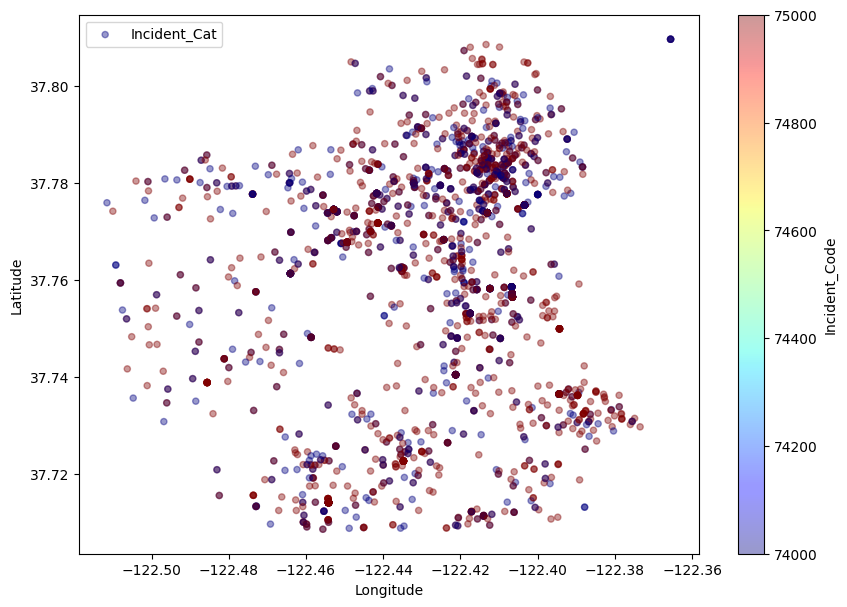

In [18]:
data_2013 = data[(data["Year"] == 2013) & (data['Incident_Cat'] == 'MISSING PERSON')]

data_2013.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
     label="Incident_Cat", figsize=(10,7),
    c="Incident_Code", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Identify the geometry value as new column to plat the map

In [19]:
crs = {'init': 'epsg:4326'}

# convention is longitude, latitude
geometry = [Point(xy) for xy in zip( data["Longitude"], data["Latitude"])]

geometry[:3]

[<POINT (-122.42 37.708)>,
 <POINT (-122.436 37.724)>,
 <POINT (-122.411 37.771)>]

In [20]:
geo_df = gpd.GeoDataFrame(data, crs = crs, geometry = geometry)

<Axes: >

(37.70787902, 37.82062084)

(-122.5136421, -122.3647507)

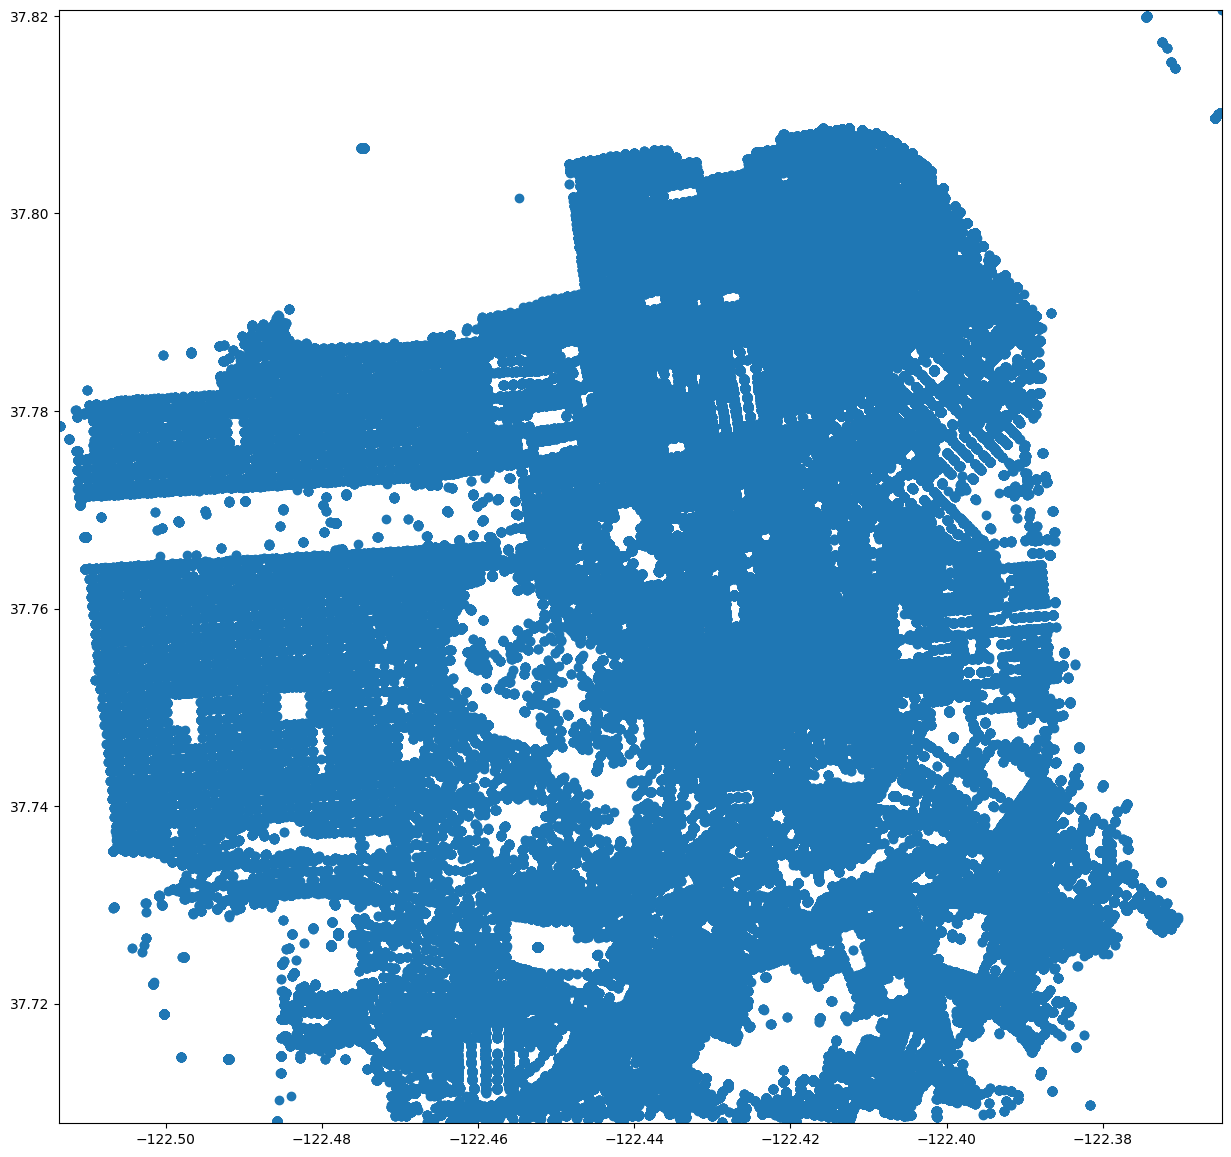

In [21]:
fig, ax = plt.subplots(figsize = (15,15))
geo_df.plot(ax = ax)
ax.set_ylim(data["Latitude"].min(),data["Latitude"].max())
ax.set_xlim(data["Longitude"].min(), data["Longitude"].max())

The map clearly shows more number of incidents are concentrated towards the north of SFO

### Scatterplot map for crime category

<Axes: xlabel='Longitude', ylabel='Latitude'>

Text(0.5, 1.0, 'Scatterplot of category crimes')

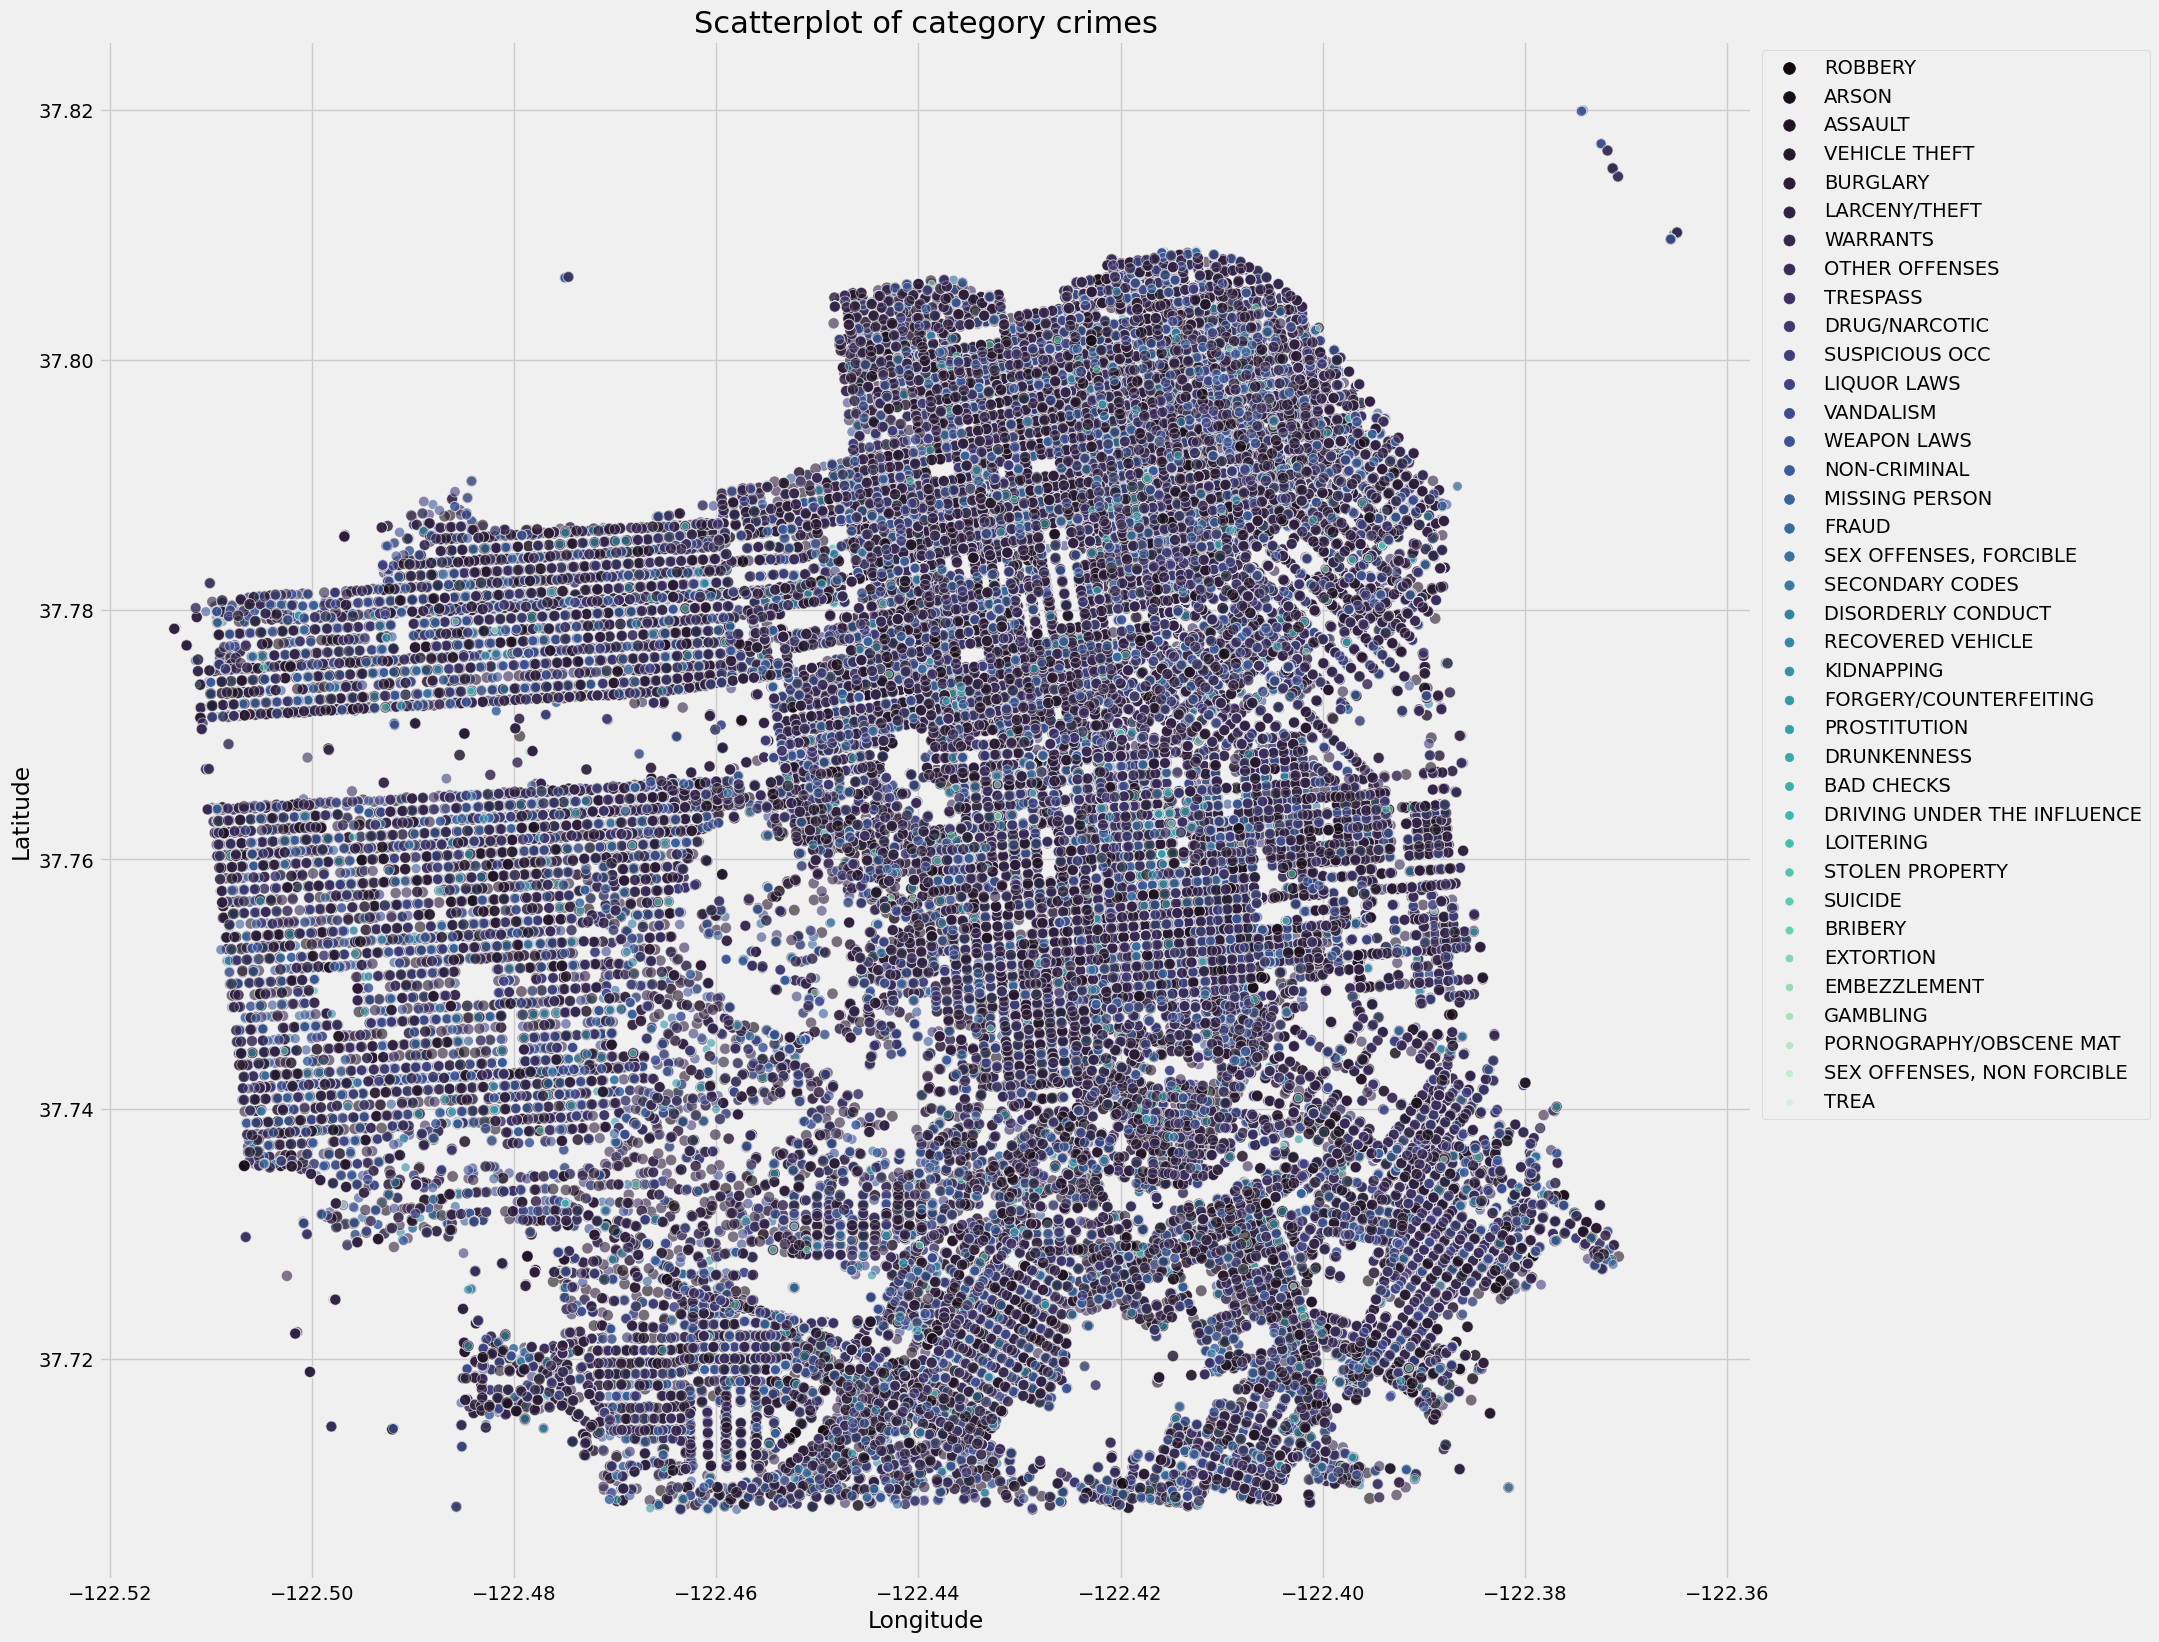

In [22]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(1, 1, figsize=(19, 19))
    sns.scatterplot(data=data.iloc[:250000], x='Longitude', y='Latitude', alpha=0.6, palette='mako', hue='Incident_Cat', size='Incident_Cat')
    plt.title("Scatterplot of category crimes", fontsize=22) 
    plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
    plt.show();

Identify the zone to build the map

In [23]:
by_zone = df_2003_2018.apply(pd.Series.value_counts).reset_index()

SFO map supporting Json file

In [27]:
import folium

sf_zones = r'./sf_neighborhoods.json'

SF_COORDINATES = (37.76, -122.45)
 

# Create an empty map zoomed in on San Francisco
sf_crime_map = folium.Map(location=SF_COORDINATES, zoom_start=12)


sf_crime_map.choropleth(
    geo_data=sf_zones,
    data=by_zone,
    columns=['index', 'PdDistrict'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='San Fransisco Crime by Neighborhood'
)

sf_crime_map

In [28]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def make_subplots_of_categories_by_year(year, df, top=12):
    """Density map subplots to show the top crimes occurred based on the year"""
    
    # San Francisco coordinates
    clat = 37.773972
    clon = -122.431297
    
    # select top 20 based on the frequency
    sf_ = df[df['Year'] == year]
    category_vc = sf_['Incident_Cat'].value_counts().to_frame()
    categories = category_vc.index.to_list()[:top]
    
    # subplots grid
    nrows = 4; ncols = 3
    fig = make_subplots(
        rows=nrows, cols=ncols, subplot_titles=categories,
        specs=[[{"type" : "mapbox"} for i in range(ncols)] for j in range(nrows)]
    )

    r = 1; c = 1
    for name in categories:
        group = sf_[sf_['Incident_Cat'] == name]
        if (c > ncols):
            r += 1
            if (r > nrows): break
            c = 1
        f = go.Densitymapbox(lat=group['Latitude'], lon=group['Longitude'], radius=1)
        fig.add_trace(trace=f, row=r, col=c)
        c += 1
    
    fig.update_layout(
        # autosize=True,
        title=year,
        height=1000, hovermode='closest', showlegend=False,
        margin=dict(l=0, r=0, t=60, b=0)
    )

    fig.update_mapboxes(
        center=dict(lat=clat, lon=clon),
        bearing=0, pitch=0, zoom=10,
        style='carto-positron'
    )
    
    fig.show()
    return None

Distribution of TOP 15 Crimes based on the Map. LARCENCY THEFT, ASSULT, VEHICLE THEFT NARCOTIC, BURGLARY are the top crime activities.

In [29]:
make_subplots_of_categories_by_year(year=2003, df=data)

### Chart to visualize Top 15 common crimes

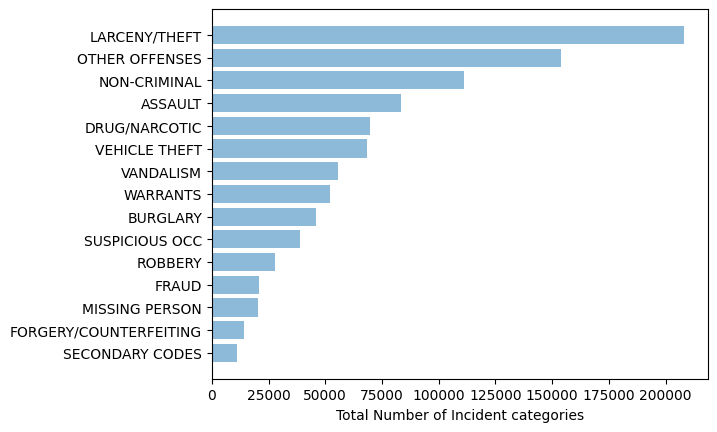

In [30]:

most_common_cat = data['Incident_Cat'].value_counts()[0:15].sort_values()

categs = most_common_cat.index
y_pos = np.arange(len(categs))
counts = most_common_cat.values

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, categs)
plt.xlabel('Total Number of Incident categories')
plt.show();

### HeatMap for Incident Category vs Weekday

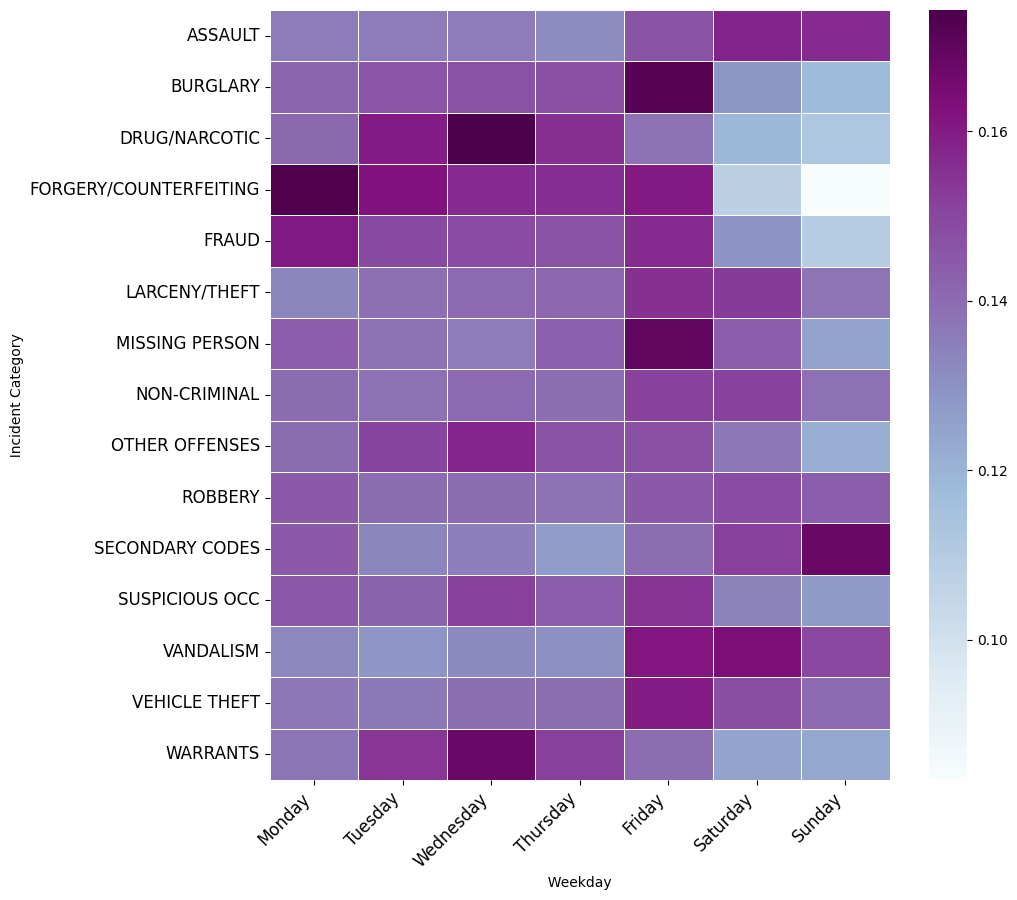

In [31]:
# Most common crimes from incident category
most_commons = data[data['Incident_Cat'].apply(lambda x: x in categs)]

# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Incident_Cat'], most_commons['DayOfWeek']) 
# Calculate percentages of crimes
cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
# Rearrange columns
cat_per_week_common = cat_per_week_common[['Monday', 
                                           'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 
                                           'Saturday','Sunday']]
# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cat_per_week_common,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("  Weekday  ")
plt.ylabel("  Incident Category  ")
plt.show();

Friday is the peak window for Burglary and missing person. Wednesday is peak for Drug/Narcotic crimes.

### Visualize the percentage of resoultion based on category

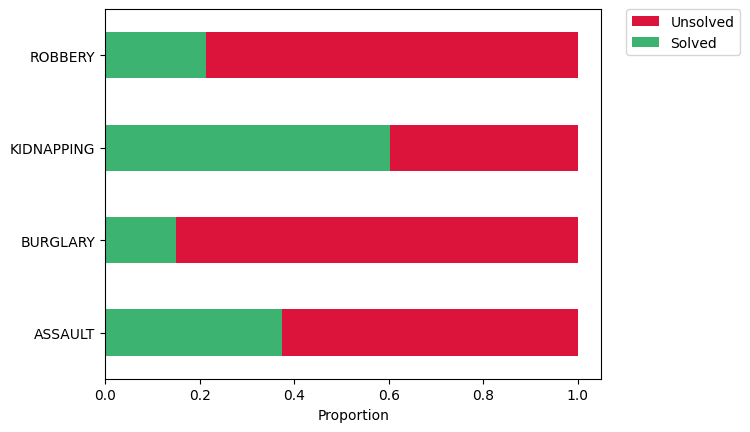

In [32]:
# Pick crime types of interest
violent = data[data.Incident_Cat.isin(['ASSAULT', 'BURGLARY',
                                       'KIDNAPPING', 'ROBBERY',  
                                       'SEX OFFENSES FORCIBLE'])].copy()
# Create Arrest variable
violent['Arrest'] = np.where(violent['Resolution'].isin(['NONE', 'NOT PROSECUTED']), 0,1)

# Calculate counts
arrest_counts = violent['Incident_Cat'][violent.Arrest==1].value_counts()[0:9]
total_counts = violent['Incident_Cat'].value_counts()[0:9]
arrest_counts = arrest_counts/(total_counts).sort_index()
total_counts = total_counts/(total_counts).sort_index()

# Plot values
total_counts.plot.barh(color='crimson', label= 'Unsolved')
arrest_counts.plot.barh(color='mediumseagreen', label='Solved')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Proportion')
plt.show();


Most of the cases are not resovlved.

### Visualizing the crime that are happening on Sunday

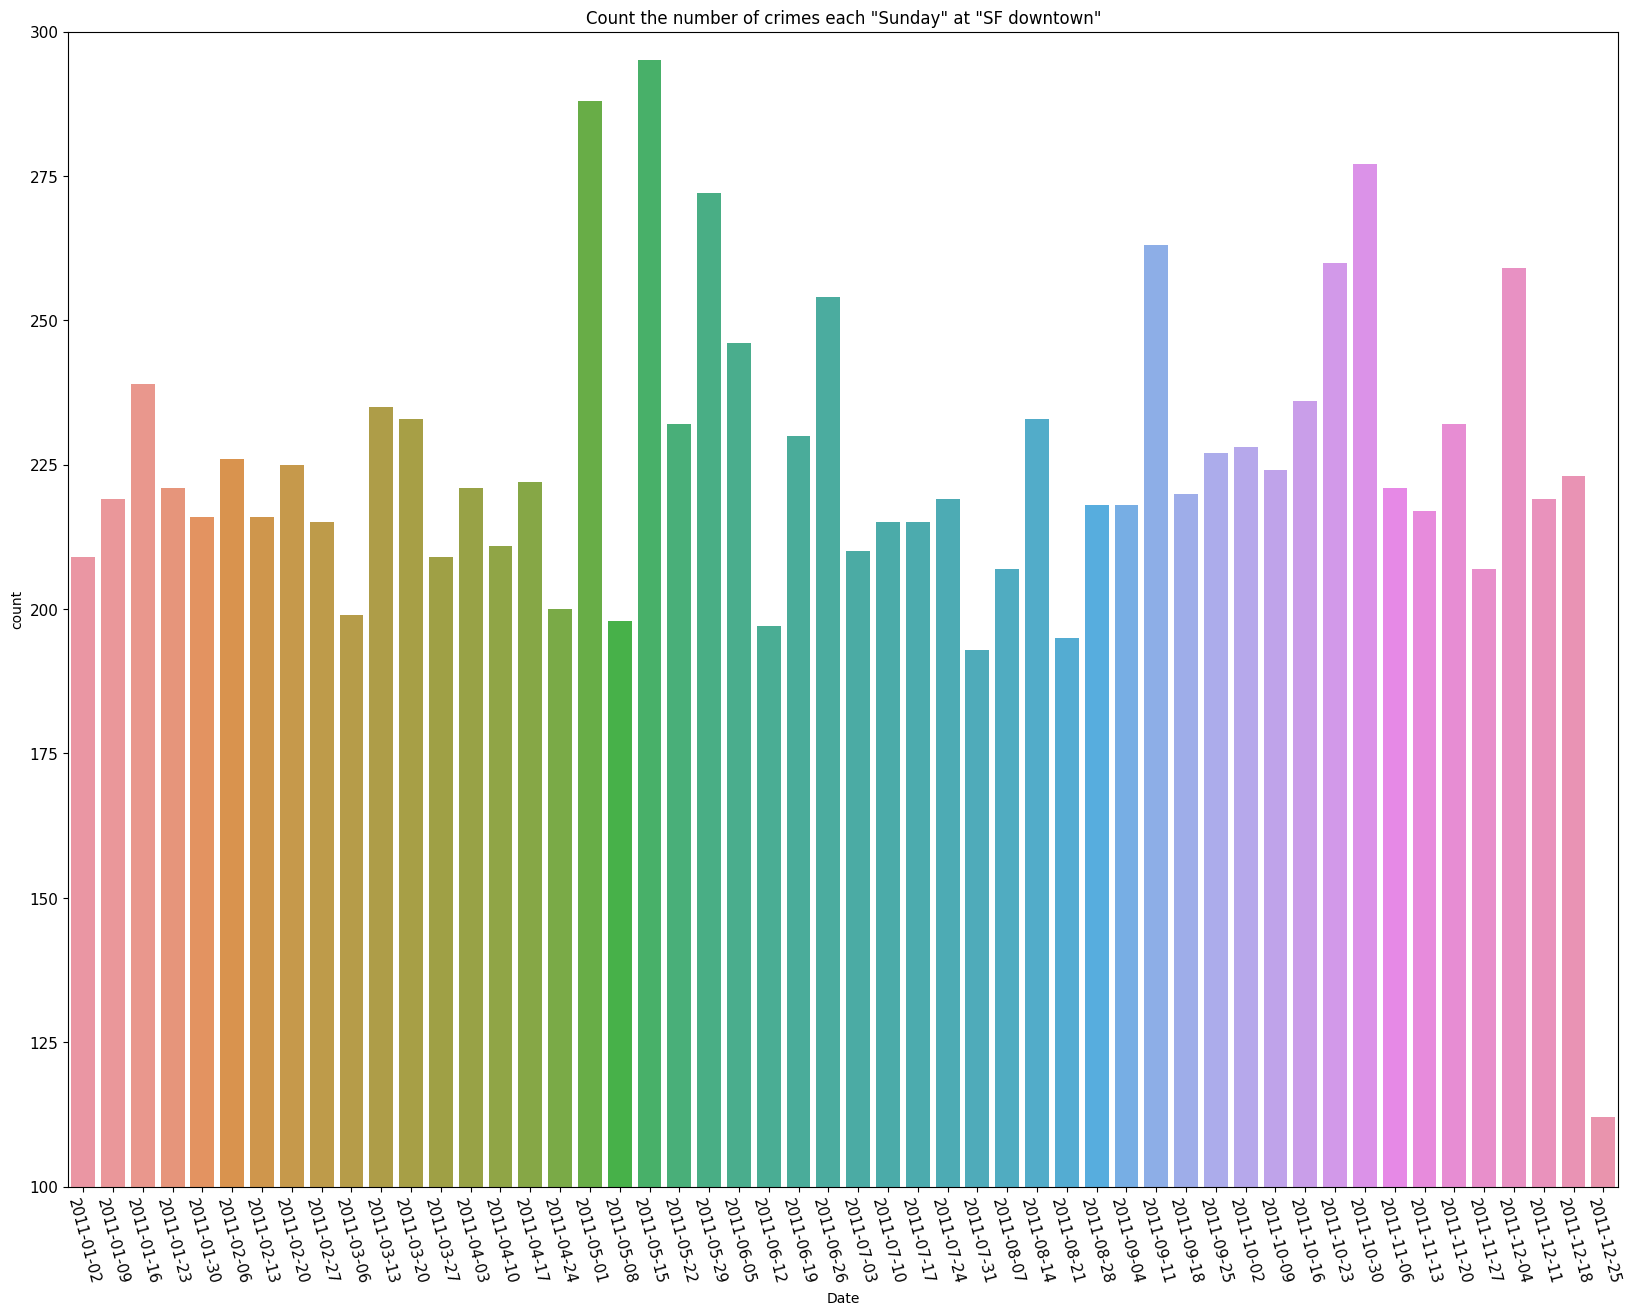

In [33]:
sun_data = data[(data['DayOfWeek'] == 'Sunday') & (data['Year'] == 2011 )].groupby(['Incident_Date','DayOfWeek']).agg({'Incident_Num':['count']})
sun_data.columns = ['Inc_count']
sun_data = sun_data.reset_index()

fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='Incident_Date',y='Inc_count',
                 data= sun_data)
ax.set_title('Count the number of crimes each "Sunday" at "SF downtown"')
ax.set_xlabel('Date')
ax.set_ylabel('count')


ax.set_ylim([100,300])
plt.xticks(rotation=-75) #important!
plt.tick_params(labelsize=11) #important!
plt.show();

More number of crimes during summer and Fall seasons.

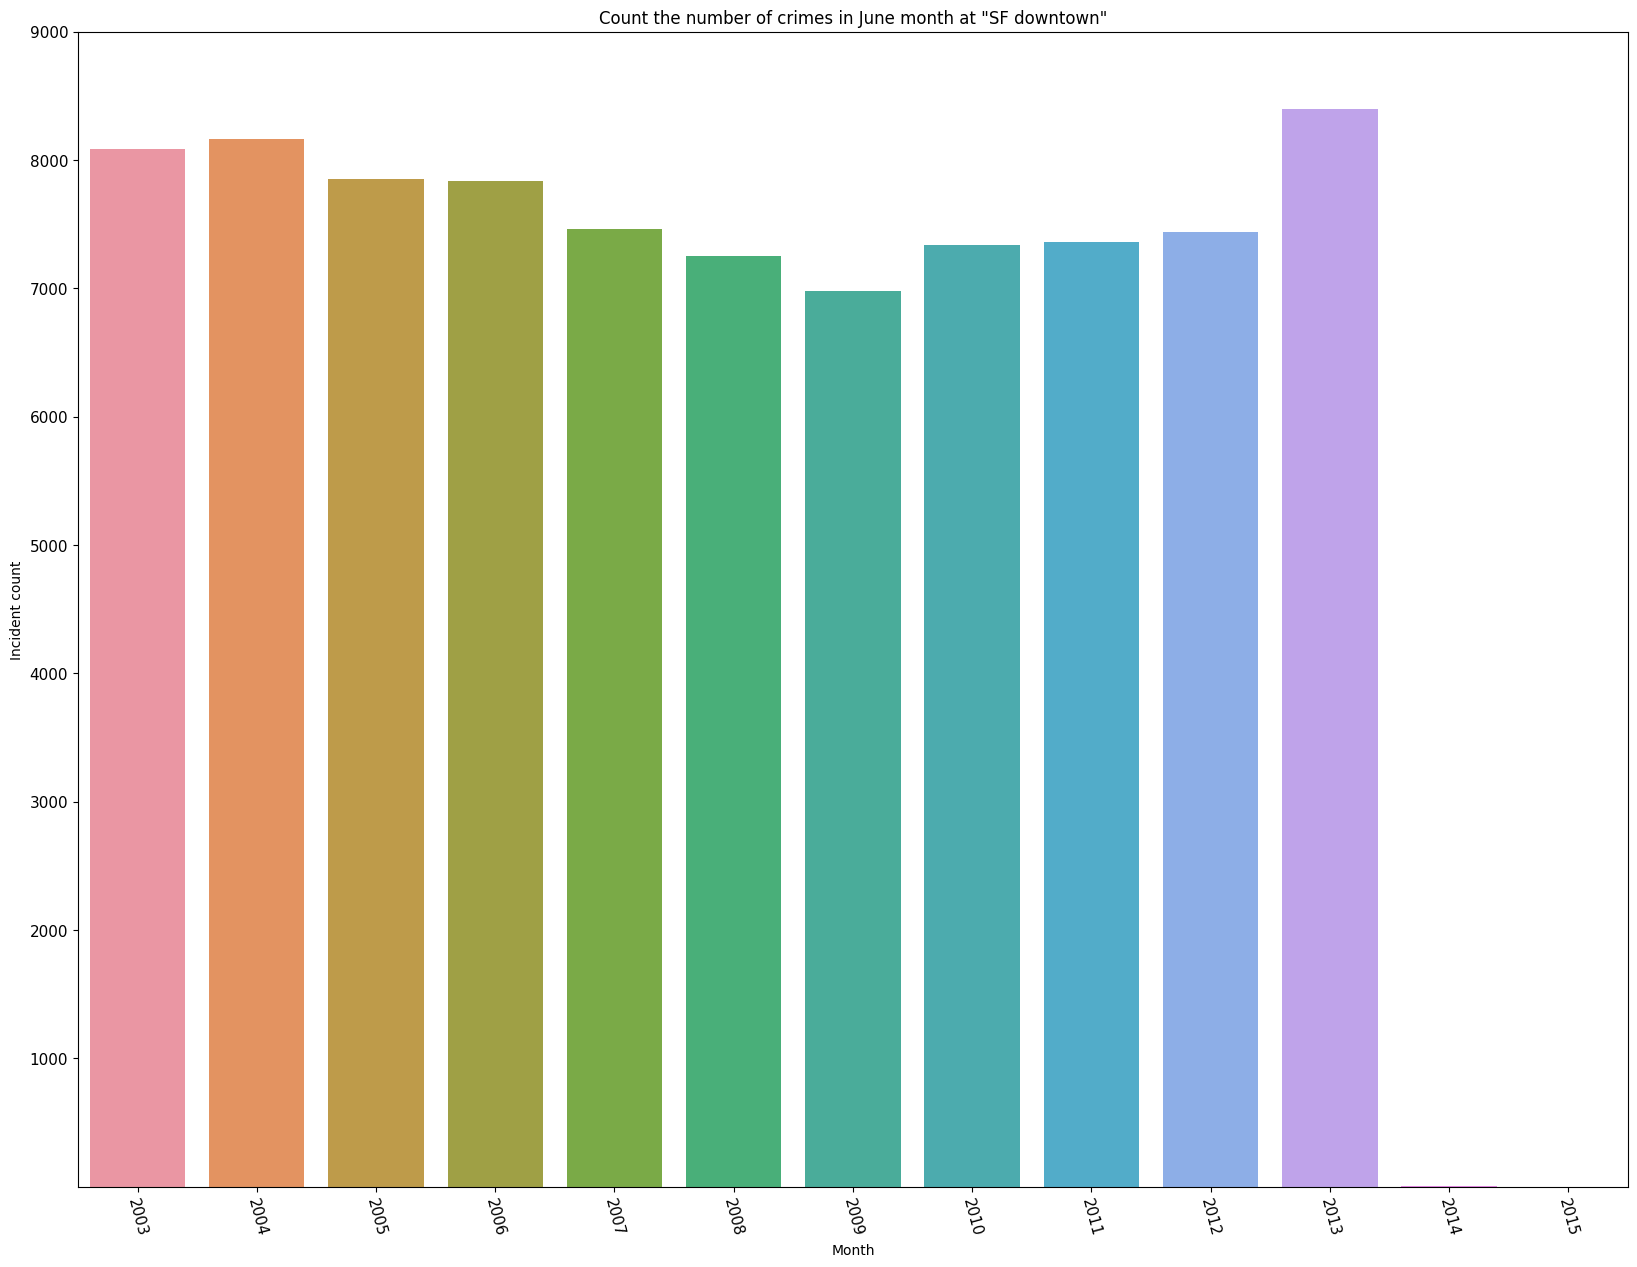

In [34]:
mon_data = data[(data['Month'] == 6)].groupby(['Year','Month']).agg({'Incident_Num':['count']})
mon_data.columns = ['Inc_count']
mon_data = mon_data.reset_index()

fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='Year',y='Inc_count',
                 data= mon_data)
ax.set_title('Count the number of crimes in June month at "SF downtown"')
ax.set_xlabel('Month')
ax.set_ylabel('Incident count')


ax.set_ylim([1,9000])
plt.xticks(rotation=-75) #important!
plt.tick_params(labelsize=11) #important!
plt.show();

Eventhough dataset says till 2018, we have more data only till 2013.

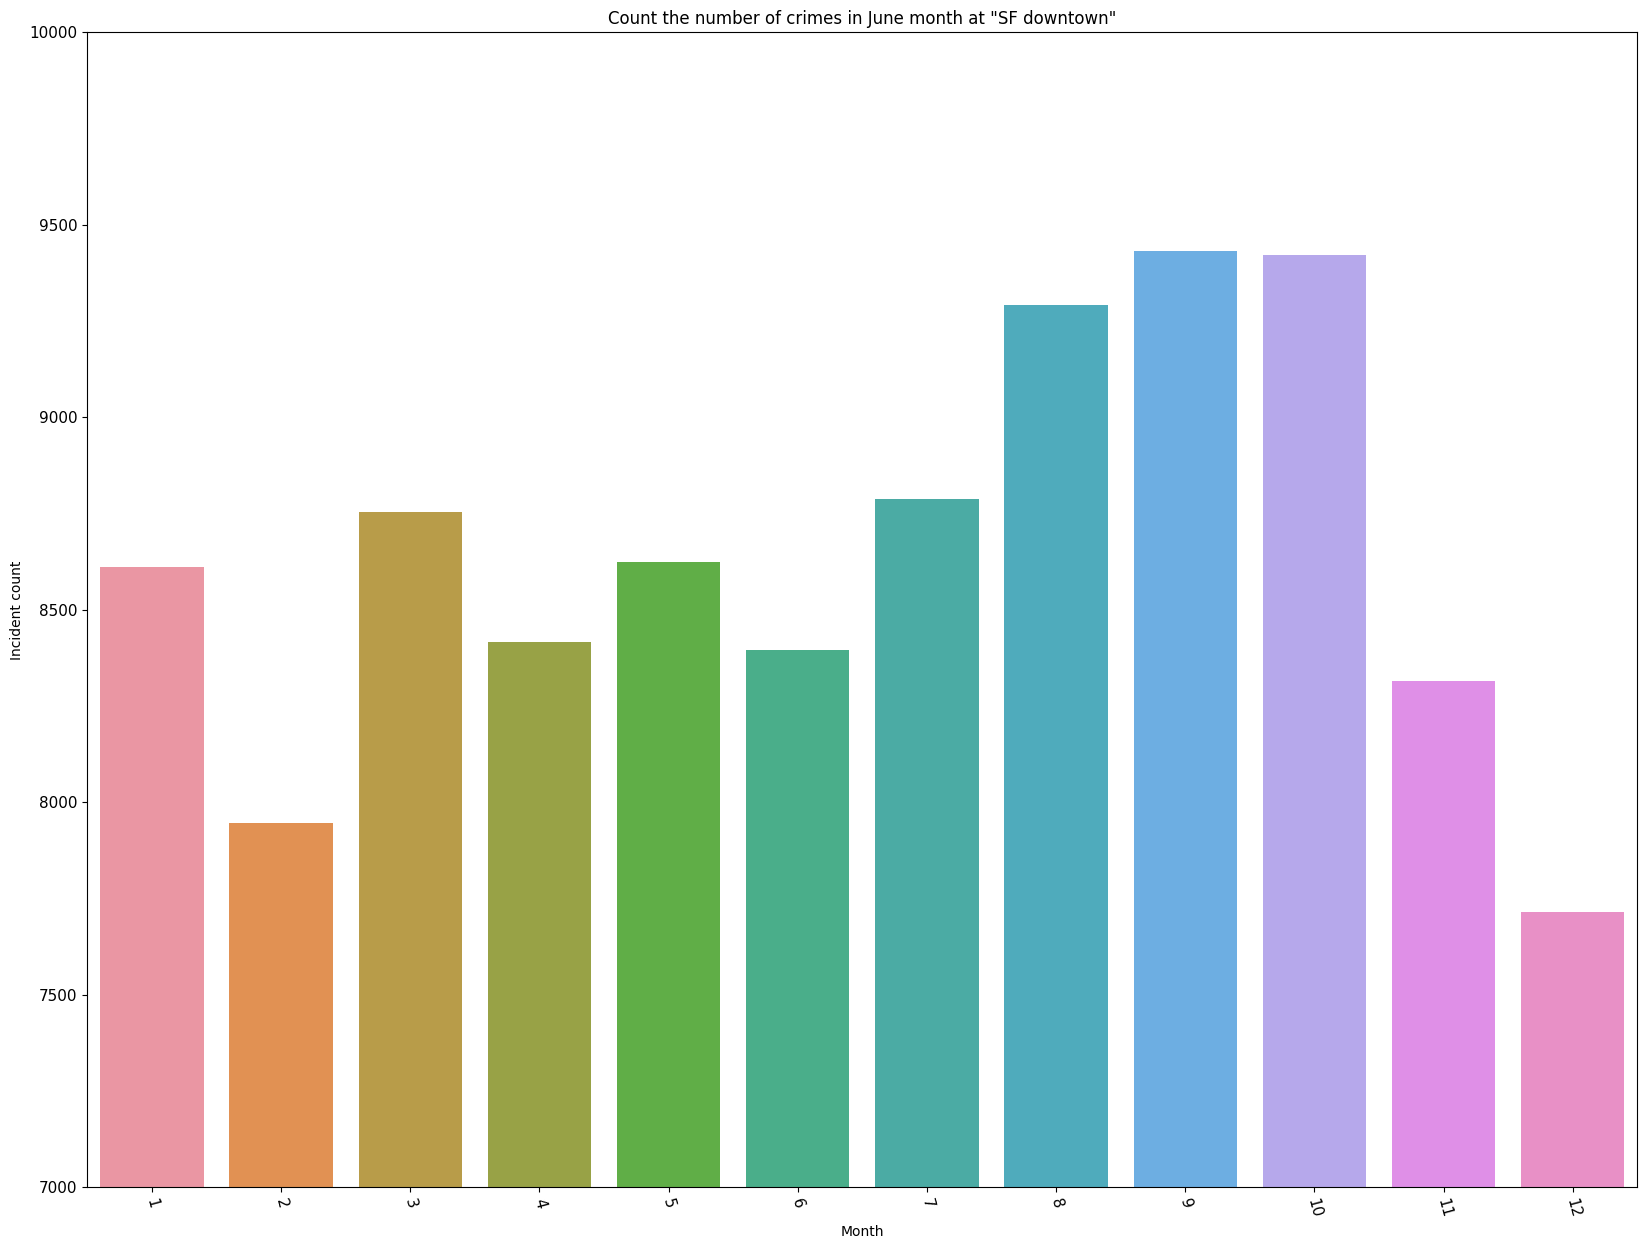

In [35]:
year_data = data[(data['Year'] == 2013)].groupby(['Month']).agg({'Incident_Num':['count']})
year_data.columns = ['Inc_count']
year_data = year_data.reset_index()

fig = plt.figure(figsize=(20,15))
ax = sns.barplot(x='Month',y='Inc_count',
                 data= year_data)
ax.set_title('Count the number of crimes in June month at "SF downtown"')
ax.set_xlabel('Month')
ax.set_ylabel('Incident count')


ax.set_ylim([7000,10000])
plt.xticks(rotation=-75) #important!
plt.tick_params(labelsize=11) #important!
plt.show();

Summer and Fall are more prone to crimes.

### Most common category based on Time Of Day

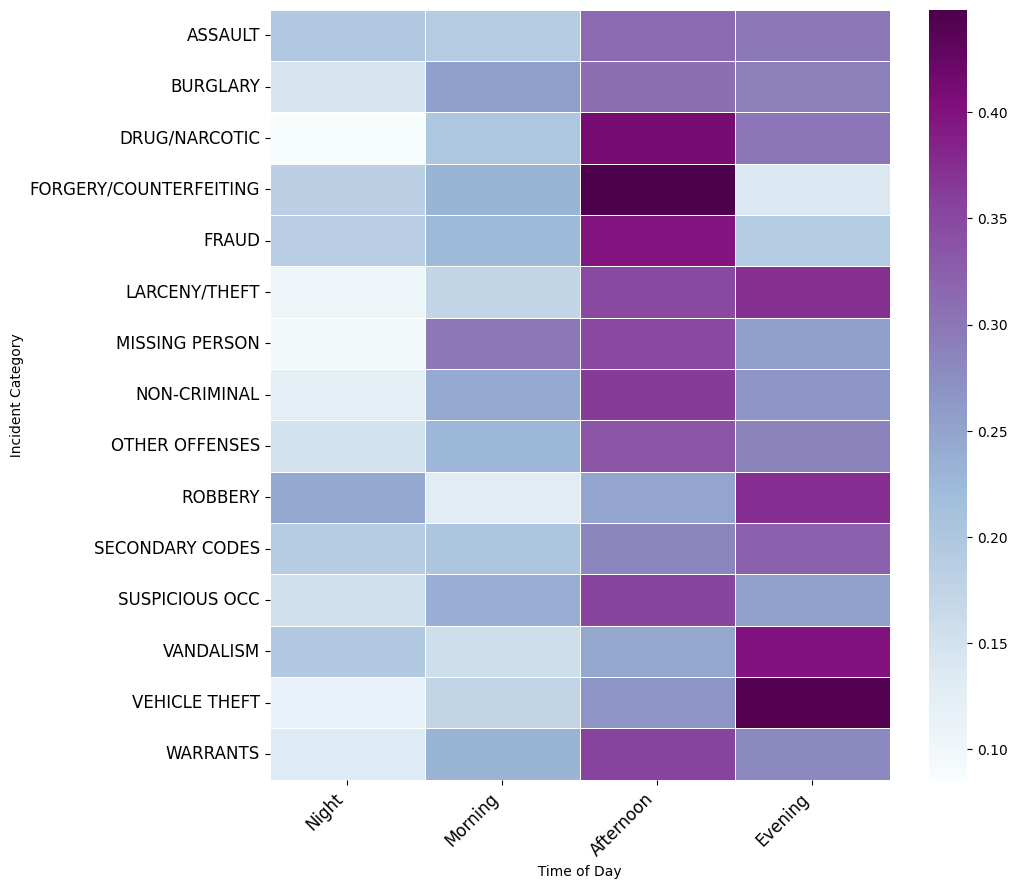

In [36]:
# Most common crimes from incident category
most_commons = data[data['Incident_Cat'].apply(lambda x: x in categs)]

# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Incident_Cat'], most_commons['TimeOfDay']) 

cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
# Rearrange columns
cat_per_week_common = cat_per_week_common[['Night', 
                                           'Morning', 'Afternoon', 
                                           'Evening']]
# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cat_per_week_common,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("  Time of Day  ")
plt.ylabel("  Incident Category  ")
plt.show();

Most of the crimes are happening during Afternoon and few are in the Evening hours.

### Most common category based on Season of the Year

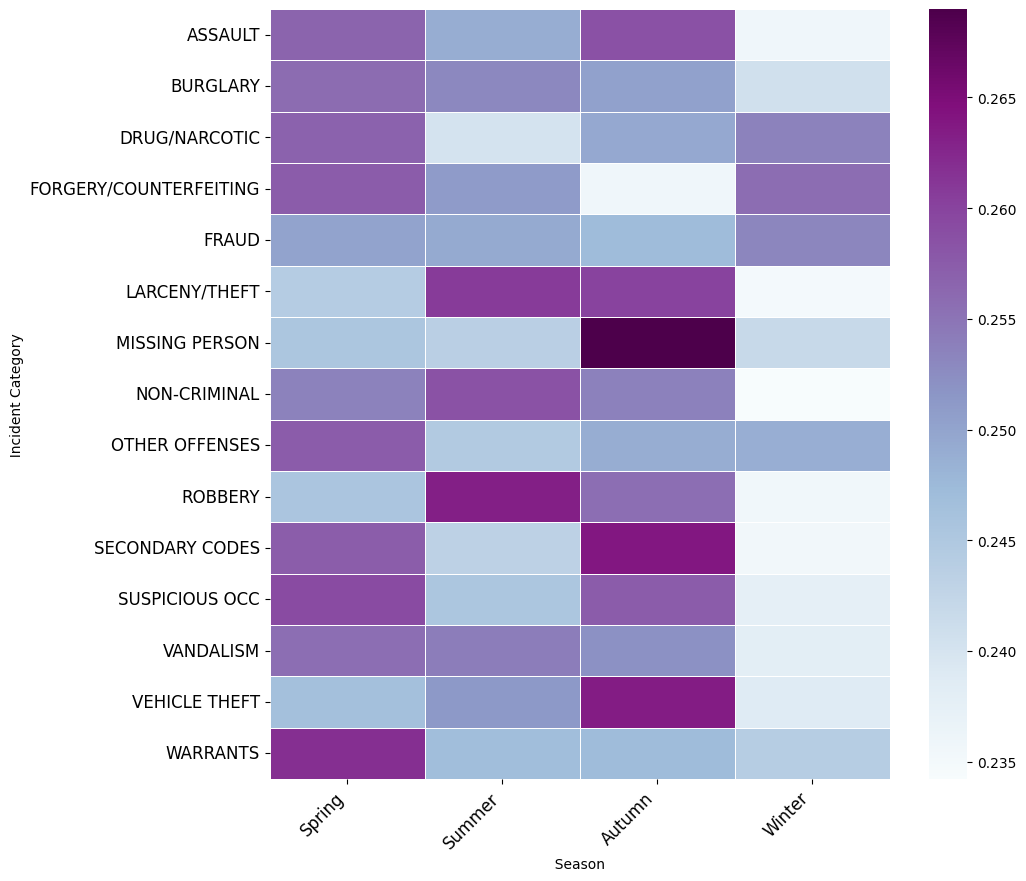

In [37]:
# Most common crimes from incident category
most_commons = data[data['Incident_Cat'].apply(lambda x: x in categs)]

# Build a cross table to get the number of each crime type per day of week
cat_per_week_common = pd.crosstab(most_commons['Incident_Cat'], most_commons['SeasonOfYear']) 

cat_per_week_common = cat_per_week_common.div(cat_per_week_common.sum(axis=1), axis=0)
# Rearrange columns
cat_per_week_common = cat_per_week_common[['Spring', 
                                           'Summer', 'Autumn', 
                                           'Winter']]
# Transform into a heat map
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(cat_per_week_common,
                 cmap="BuPu", linewidths=.5)
plt.xticks(fontsize=12,rotation=45,ha='right')
plt.yticks(fontsize=12)
plt.xlabel("  Season  ")
plt.ylabel("  Incident Category  ")
plt.show();

Most of the crimes were happening during Autumn season.

## Feature Engineering

#### Converting the text to numerical values for the required features

In [38]:
dayofweek_replace={'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}
season_replace = {'Spring':1,'Summer':2,'Autumn':3,'Winter':4}
timeofday_replace={'Night':1,'Morning':2,'Afternoon':3,'Evening':4}
policedst_replace={'BAYVIEW':1,'CENTRAL':2,'INGLESIDE':3,'MISSION':4,'NORTHERN':5,
'PARK':6,'RICHMOND':7,'SOUTHERN':8,'TARAVAL':9,'TENDERLOIN':10}

In [39]:
category_replace = {'ARSON':1,
'ASSAULT':2,
'BAD CHECKS':3,
'BRIBERY':4,
'BURGLARY':5,
'DISORDERLY CONDUCT':6,
'DRIVING UNDER THE INFLUENCE':7,
'DRUG/NARCOTIC':8,
'DRUNKENNESS':9,
'EMBEZZLEMENT':10,
'EXTORTION':11,
'FORGERY/COUNTERFEITING':12,
'FRAUD':13,
'GAMBLING':14,
'KIDNAPPING':15,
'LARCENY/THEFT':16,
'LIQUOR LAWS':17,
'LOITERING':18,
'MISSING PERSON':19,
'NON-CRIMINAL':20,
'OTHER OFFENSES':21,
'PORNOGRAPHY/OBSCENE MAT':22,
'PROSTITUTION':23,
'RECOVERED VEHICLE':24,
'ROBBERY':25,
'SECONDARY CODES':26,
'SEX OFFENSES, FORCIBLE':27,
'SEX OFFENSES, NON FORCIBLE':28,
'STOLEN PROPERTY':29,
'SUICIDE':30,
'SUSPICIOUS OCC':31,
'TREA':32,
'TRESPASS':33,
'VANDALISM':34,
'VEHICLE THEFT':35,
'WARRANTS':36,
'WEAPON LAWS':37}

#### Replace the values of the features from text to numerical values

In [40]:
data['DayOfWeek'] = data['DayOfWeek'].map(dayofweek_replace)
data['SeasonOfYear'] = data['SeasonOfYear'].map(season_replace)
data['TimeOfDay'] = data['TimeOfDay'].map(timeofday_replace)
data['Incident_Cat'] = data['Incident_Cat'].map(category_replace)
data['Police_Dist'] = data['Police_Dist'].map(policedst_replace)

In [41]:
data.dtypes

Incident_Datetime          datetime64[ns]
Report_Datetime            datetime64[ns]
Report Type Code                   object
Report Type Description            object
Filed Online                       object
Incident_Date                      object
Incident_Time                      object
DayOfWeek                           int64
Incident_Num                        int64
Incident_Code                       int64
Incident_Cat                        int64
Incident_Desc                      object
Incident Subcategory               object
Address                            object
Police_Dist                         int64
Resolution                         object
Analysis_Neigh                    float64
Neighborhoods                     float64
Central_Mar_Ten_Boun              float64
Civic_Cen_Har_Red                 float64
Cur_Pol_Dist                      float64
Cur_Sup_Dist                      float64
HSOC_Zones                        float64
Longitude                         

### Required Data for analysis and model design

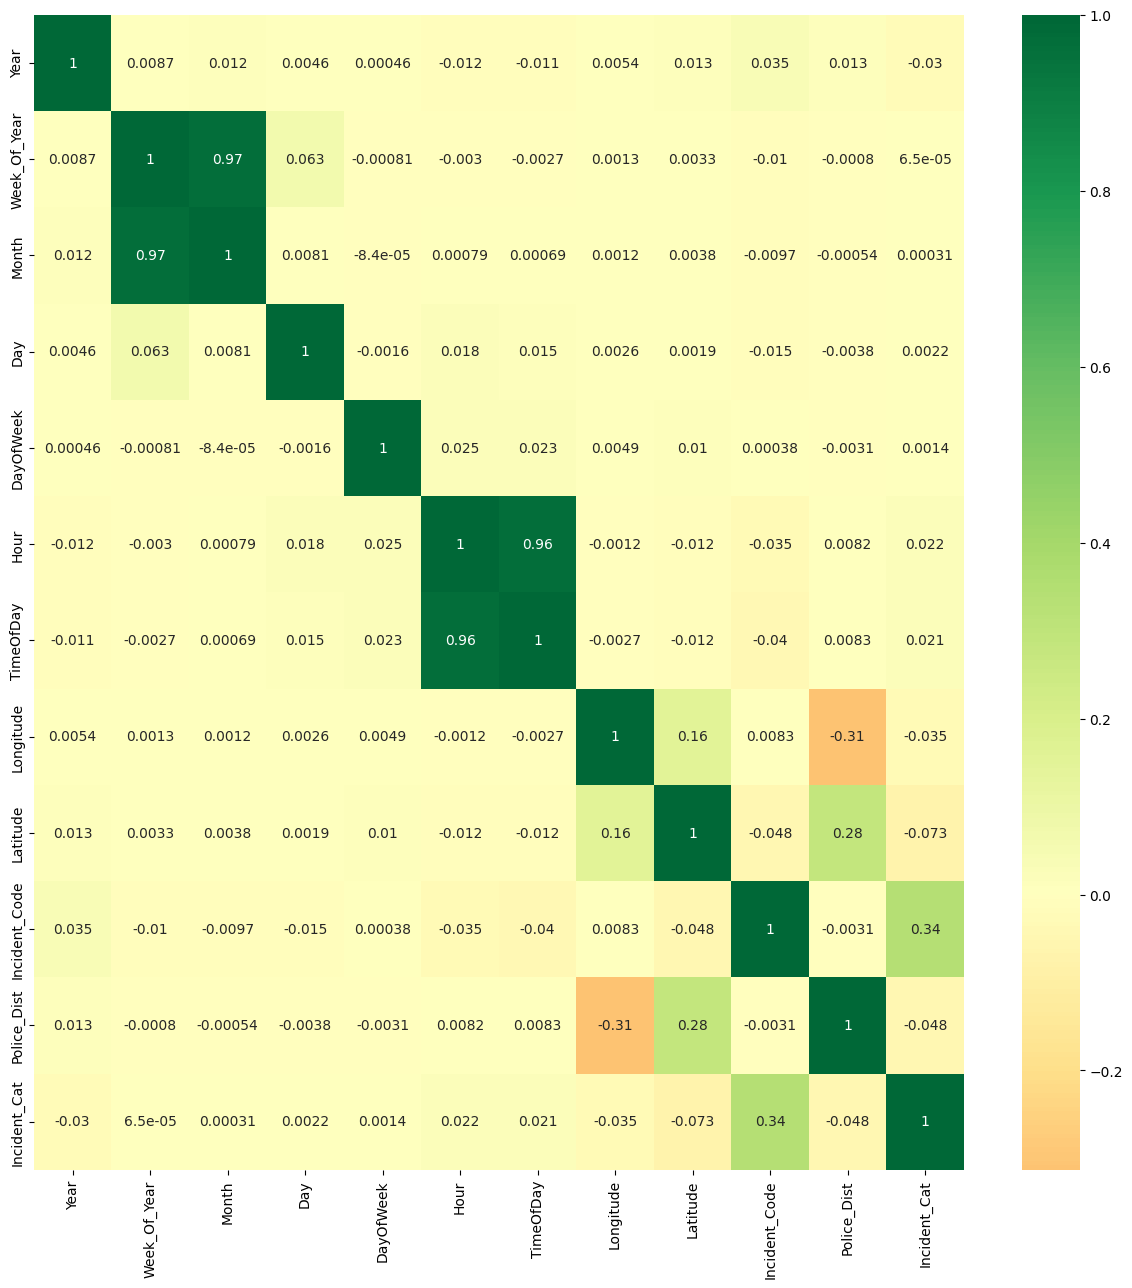

In [42]:
X = data[['Year','Week_Of_Year','Month','Day','DayOfWeek','Hour','TimeOfDay','Longitude','Latitude',
         'Incident_Code','Police_Dist','Incident_Cat']]
plt.figure(figsize=(15,15))
p=sns.heatmap(X.corr(), annot=True,cmap='RdYlGn',center=0) 
plt.show();

These attributes are highly correlated.

### Prepare the data for Train and Test

In [43]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
y=X['Incident_Cat']
X.drop(columns=['Incident_Cat'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Sample Train Data

In [44]:
X.head()

Year  Week_Of_Year  Month  Day  DayOfWeek  Hour  TimeOfDay   Longitude  \
0  2004            48     11   22          2    17          3 -122.420084   
3  2011             7      2   18          6     5          1 -122.436220   
4  2010            46     11   21          1    17          3 -122.410541   
5  2013            14      4    2          3    15          3 -122.470366   
6  2017            31      8    6          1    18          4 -122.403405   

    Latitude  Incident_Code  Police_Dist  
0  37.708311           3074            3  
3  37.724377          26030            3  
4  37.770913           4134            8  
5  37.745158           4134            9  
6  37.775421           4134            8

## Random Forest

Random Forest is one of the most popular and commonly used algorithms by Data Scientists. Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

One of the most important features of the Random Forest Algorithm is that it can handle the data set containing continuous variables, as in the case of regression, and categorical variables, as in the case of classification. It performs better for classification and regression tasks. In this tutorial, we will understand the working of random forest and implement random forest on a classification task.

Link: https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

Random Forest with Entropy

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

randomforest = RandomForestClassifier(criterion="entropy",random_state=0,max_depth = 10, n_estimators=50)

e_model = randomforest.fit(X_train, y_train)

y_epred = e_model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_epred))

Accuracy :  0.8370710429767726


Random Forest with Gini

In [46]:
grandomforest = RandomForestClassifier(criterion="gini",random_state=0,max_depth = 10, n_estimators=50)

g_model = grandomforest.fit(X_train, y_train)

y_gpred = g_model.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_gpred))

Accuracy :  0.7659771985935105


The Accuracy of Entropy is better than Gini

There are 37 classes

In [47]:
class_names = [
    'Class 1','Class 2','Class 3','Class 4','Class 5','Class 6','Class 7','Class 8','Class 9','Class 10',
    'Class 11','Class 12','Class 13','Class 14','Class 15','Class 16','Class 17','Class 18','Class 19','Class 20',
    'Class 21','Class 22','Class 23','Class 24','Class 25','Class 26','Class 27','Class 28','Class 29','Class 30',
    'Class 31','Class 32','Class 33','Class 34','Class 35','Class 36','Class 37']

Function to draw confusion Matrix

In [48]:
def con_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    classnames = class_names
    # Plot confusion matrix in a beautiful manner
    fig = plt.figure(figsize=(35, 30))
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(classnames, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True', fontsize=20)
    ax.yaxis.set_ticklabels(classnames, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title(f'The model {model_name} Confusion Matrix', fontsize=20)

    plt.show();

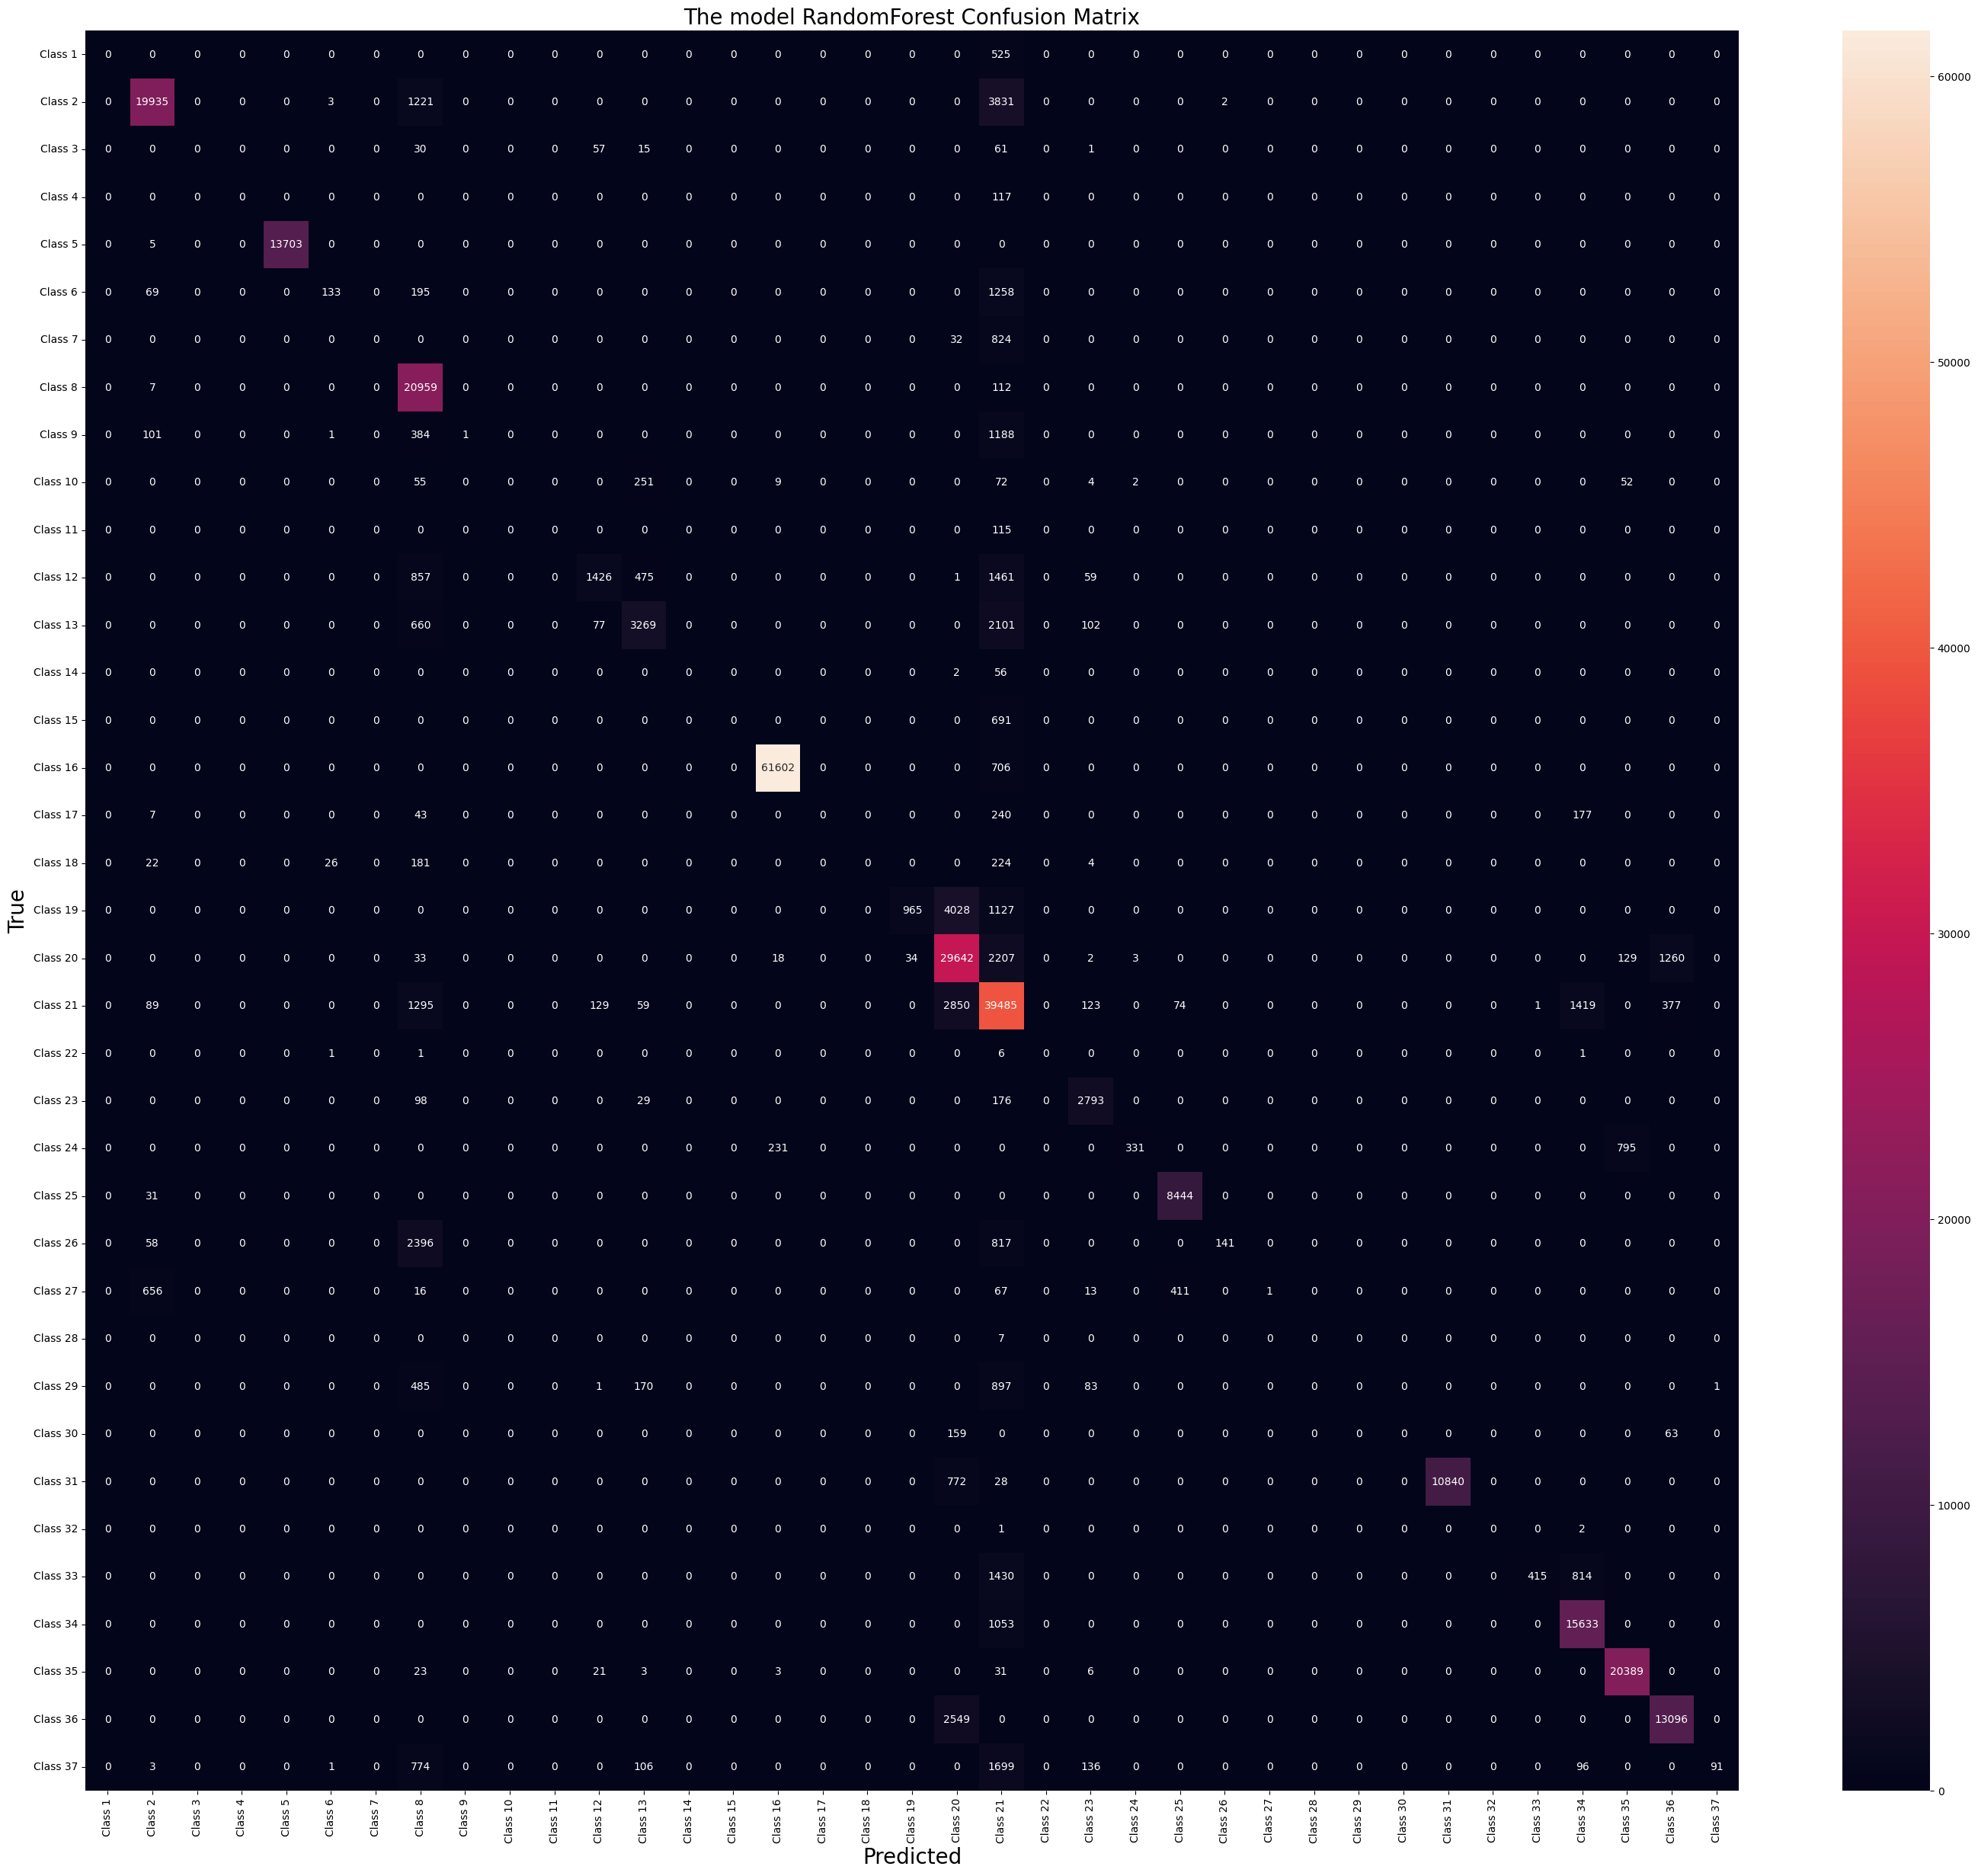

In [49]:
con_matrix(y_test, y_epred,"RandomForest")

In [50]:
print("\n\tClassificatin report for Randomforest\n\n",classification_report(y_test,y_epred, target_names=class_names))


	Classificatin report for Randomforest

               precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       525
     Class 2       0.95      0.80      0.87     24992
     Class 3       0.00      0.00      0.00       164
     Class 4       0.00      0.00      0.00       117
     Class 5       1.00      1.00      1.00     13708
     Class 6       0.81      0.08      0.15      1655
     Class 7       0.00      0.00      0.00       856
     Class 8       0.71      0.99      0.83     21078
     Class 9       1.00      0.00      0.00      1675
    Class 10       0.00      0.00      0.00       445
    Class 11       0.00      0.00      0.00       115
    Class 12       0.83      0.33      0.48      4279
    Class 13       0.75      0.53      0.62      6209
    Class 14       0.00      0.00      0.00        58
    Class 15       0.00      0.00      0.00       691
    Class 16       1.00      0.99      0.99     62308
    Class 17       0.00      0.00      

### K Neighbors Classification

The k-nearest neighbors (KNN) algorithm is a data classification method for estimating the likelihood that a data point will become a member of one group or another based on what group the data points nearest to it belong to.

The k-nearest neighbor algorithm is a type of supervised machine learning algorithm used to solve classification and regression problems. However, it's mainly used for classification problems.

KNN is a lazy learning and non-parametric algorithm.

It's called a lazy learning algorithm or lazy learner because it doesn't perform any training when you supply the training data. Instead, it just stores the data during the training time and doesn't perform any calculations. It doesn't build a model until a query is performed on the dataset.

Link: https://learn.g2.com/k-nearest-neighbor

Number of neighbors values near to 100 giving a very good accuracy.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

KNeighbors = KNeighborsClassifier(n_neighbors=100)

k_model = KNeighbors.fit(X_train, y_train)

y_pred = k_model.predict(X_test)
print("KNeighbors Accuracy : ",accuracy_score(y_test,y_pred))

KNeighbors Accuracy :  0.987963451621723


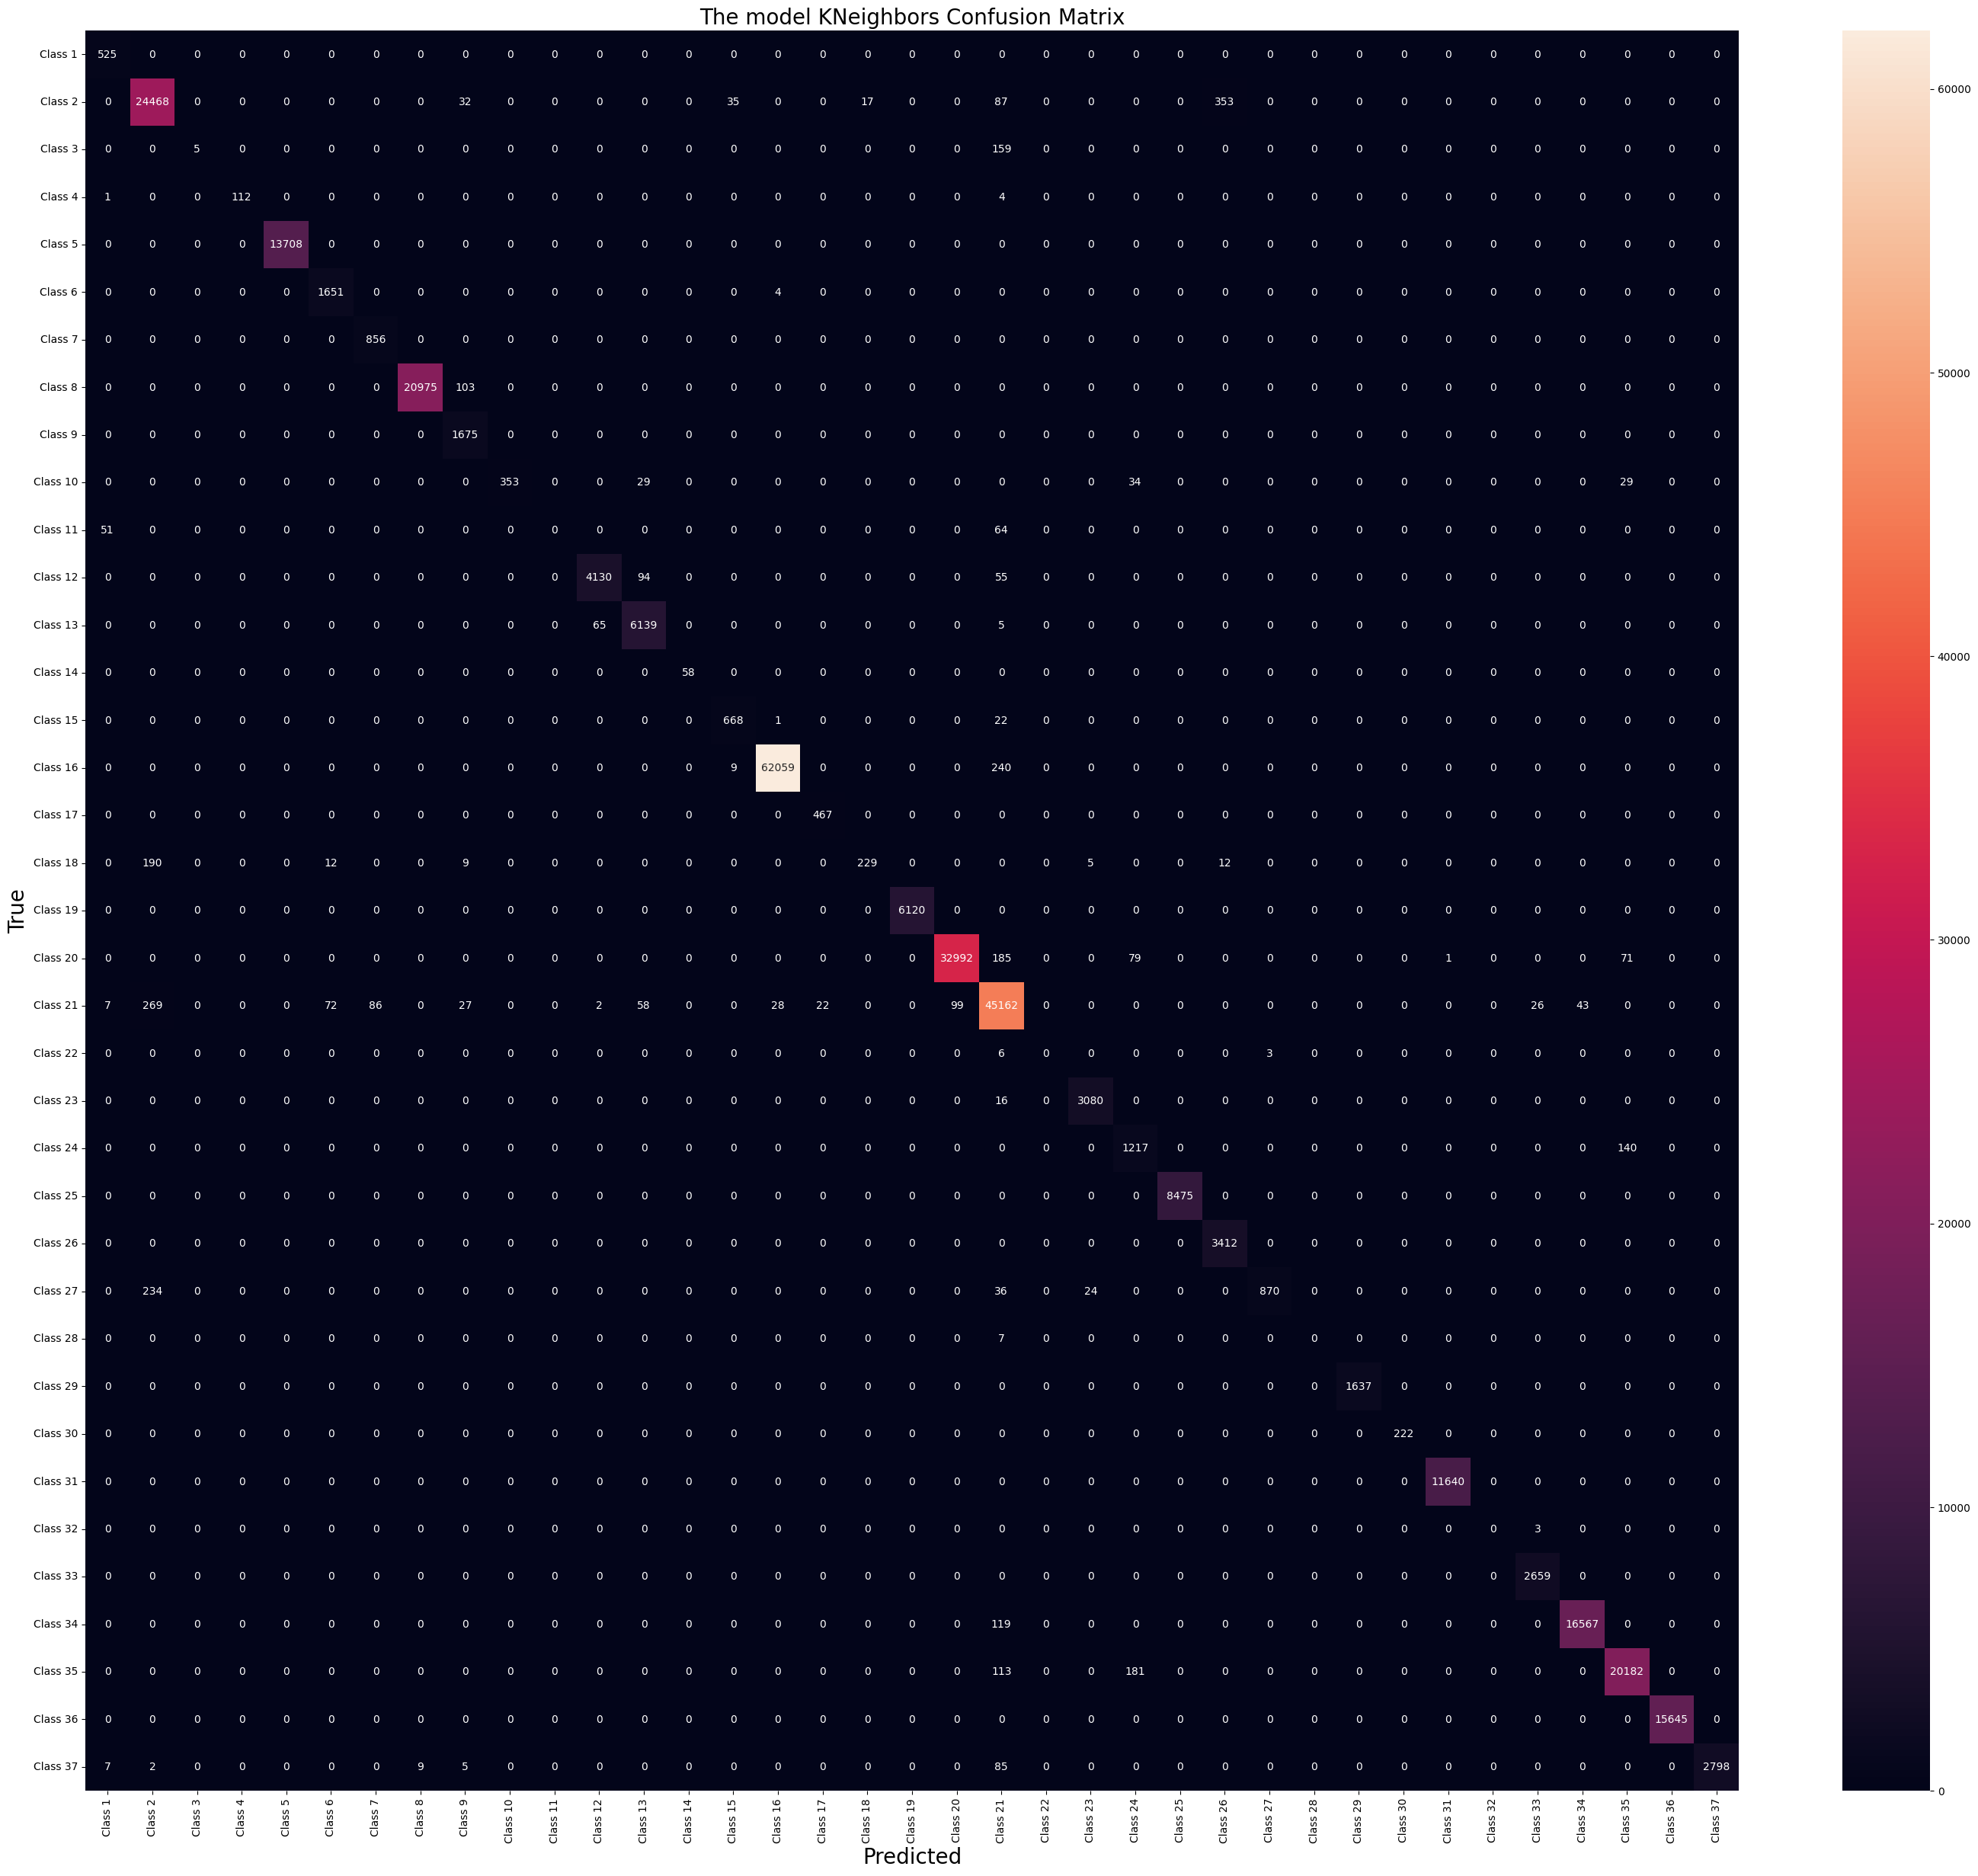

In [52]:
con_matrix(y_test, y_pred,"KNeighbors")

In [53]:
print("\n\tClassificatin report for KNeighbors\n\n",classification_report(y_test,y_pred, target_names=class_names))


	Classificatin report for KNeighbors

               precision    recall  f1-score   support

     Class 1       0.89      1.00      0.94       525
     Class 2       0.97      0.98      0.98     24992
     Class 3       1.00      0.03      0.06       164
     Class 4       1.00      0.96      0.98       117
     Class 5       1.00      1.00      1.00     13708
     Class 6       0.95      1.00      0.97      1655
     Class 7       0.91      1.00      0.95       856
     Class 8       1.00      1.00      1.00     21078
     Class 9       0.90      1.00      0.95      1675
    Class 10       1.00      0.79      0.88       445
    Class 11       0.00      0.00      0.00       115
    Class 12       0.98      0.97      0.97      4279
    Class 13       0.97      0.99      0.98      6209
    Class 14       1.00      1.00      1.00        58
    Class 15       0.94      0.97      0.95       691
    Class 16       1.00      1.00      1.00     62308
    Class 17       0.96      1.00      0.

## Artificial Neural Network

Artificial neural networks are one of the main tools used in machine learning. As the “neural” part of their name suggests, they are brain-inspired systems which are intended to replicate the way that we humans learn. Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use. ANNs have three layers that are interconnected. The first layer consists of input neurons. Those neurons send data on to the second layer, which in turn sends the output neurons to the third layer. ANNs are considered non-linear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found.

Link: https://www.kaggle.com/code/shrutimechlearn/deep-tutorial-1-ann-and-classification

In [54]:
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError

Function to plot the history chart based on epochs

In [55]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show();

Use Standard scalar to fit the given data and convert the y (target) values into categorical format

In [56]:
sc = StandardScaler()
AX_train = pd.DataFrame(sc.fit_transform(X_train))
AX_test = pd.DataFrame(sc.fit_transform(X_test))
Ay_train = to_categorical(y_train)
Ay_test = to_categorical(y_test)

The input shape is 11 based on the number of attributes and output is number of classes.

In [57]:
ann_model = Sequential()
ann_model.add(Dense(121, input_shape = (11,), activation = "relu"))
ann_model.add(Dense(76, activation = "relu"))
ann_model.add(Dropout(0.2))
ann_model.add(Dense(38, activation = "softmax"))
ann_model.compile(Adam(learning_rate = 0.01), "categorical_crossentropy", metrics = ["accuracy"])
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 121)               1452      
                                                                 
 dense_1 (Dense)             (None, 76)                9272      
                                                                 
 dropout (Dropout)           (None, 76)                0         
                                                                 
 dense_2 (Dense)             (None, 38)                2926      
                                                                 
Total params: 13,650
Trainable params: 13,650
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = ann_model.fit(AX_train, Ay_train, verbose=1, epochs=10)

Epoch 1/10
22936/22936 [==============================] - 81s 3ms/step - loss: 0.8292 - accuracy: 0.7089
Epoch 2/10
22936/22936 [==============================] - 76s 3ms/step - loss: 0.6400 - accuracy: 0.7859
Epoch 3/10
22936/22936 [==============================] - 77s 3ms/step - loss: 0.6108 - accuracy: 0.7952
Epoch 4/10
22936/22936 [==============================] - 75s 3ms/step - loss: 0.6116 - accuracy: 0.7957
Epoch 5/10
22936/22936 [==============================] - 84s 4ms/step - loss: 0.6493 - accuracy: 0.7880
Epoch 6/10
22936/22936 [==============================] - 76s 3ms/step - loss: 0.6629 - accuracy: 0.7865
Epoch 7/10
22936/22936 [==============================] - 82s 4ms/step - loss: 0.6547 - accuracy: 0.7898
Epoch 8/10
22936/22936 [==============================] - 82s 4ms/step - loss: 0.6678 - accuracy: 0.7851
Epoch 9/10
22936/22936 [==============================] - 78s 3ms/step - loss: 0.6765 - accuracy: 0.7826
Epoch 10/10
22936/22936 [==============================

In [59]:
Ay_pred=ann_model.predict(AX_test) 
Ay_pred_class=np.argmax(Ay_pred,axis=1)
Ay_test_class = np.argmax(Ay_test, axis=1)

9830/9830 [==============================] - 15s 1ms/step


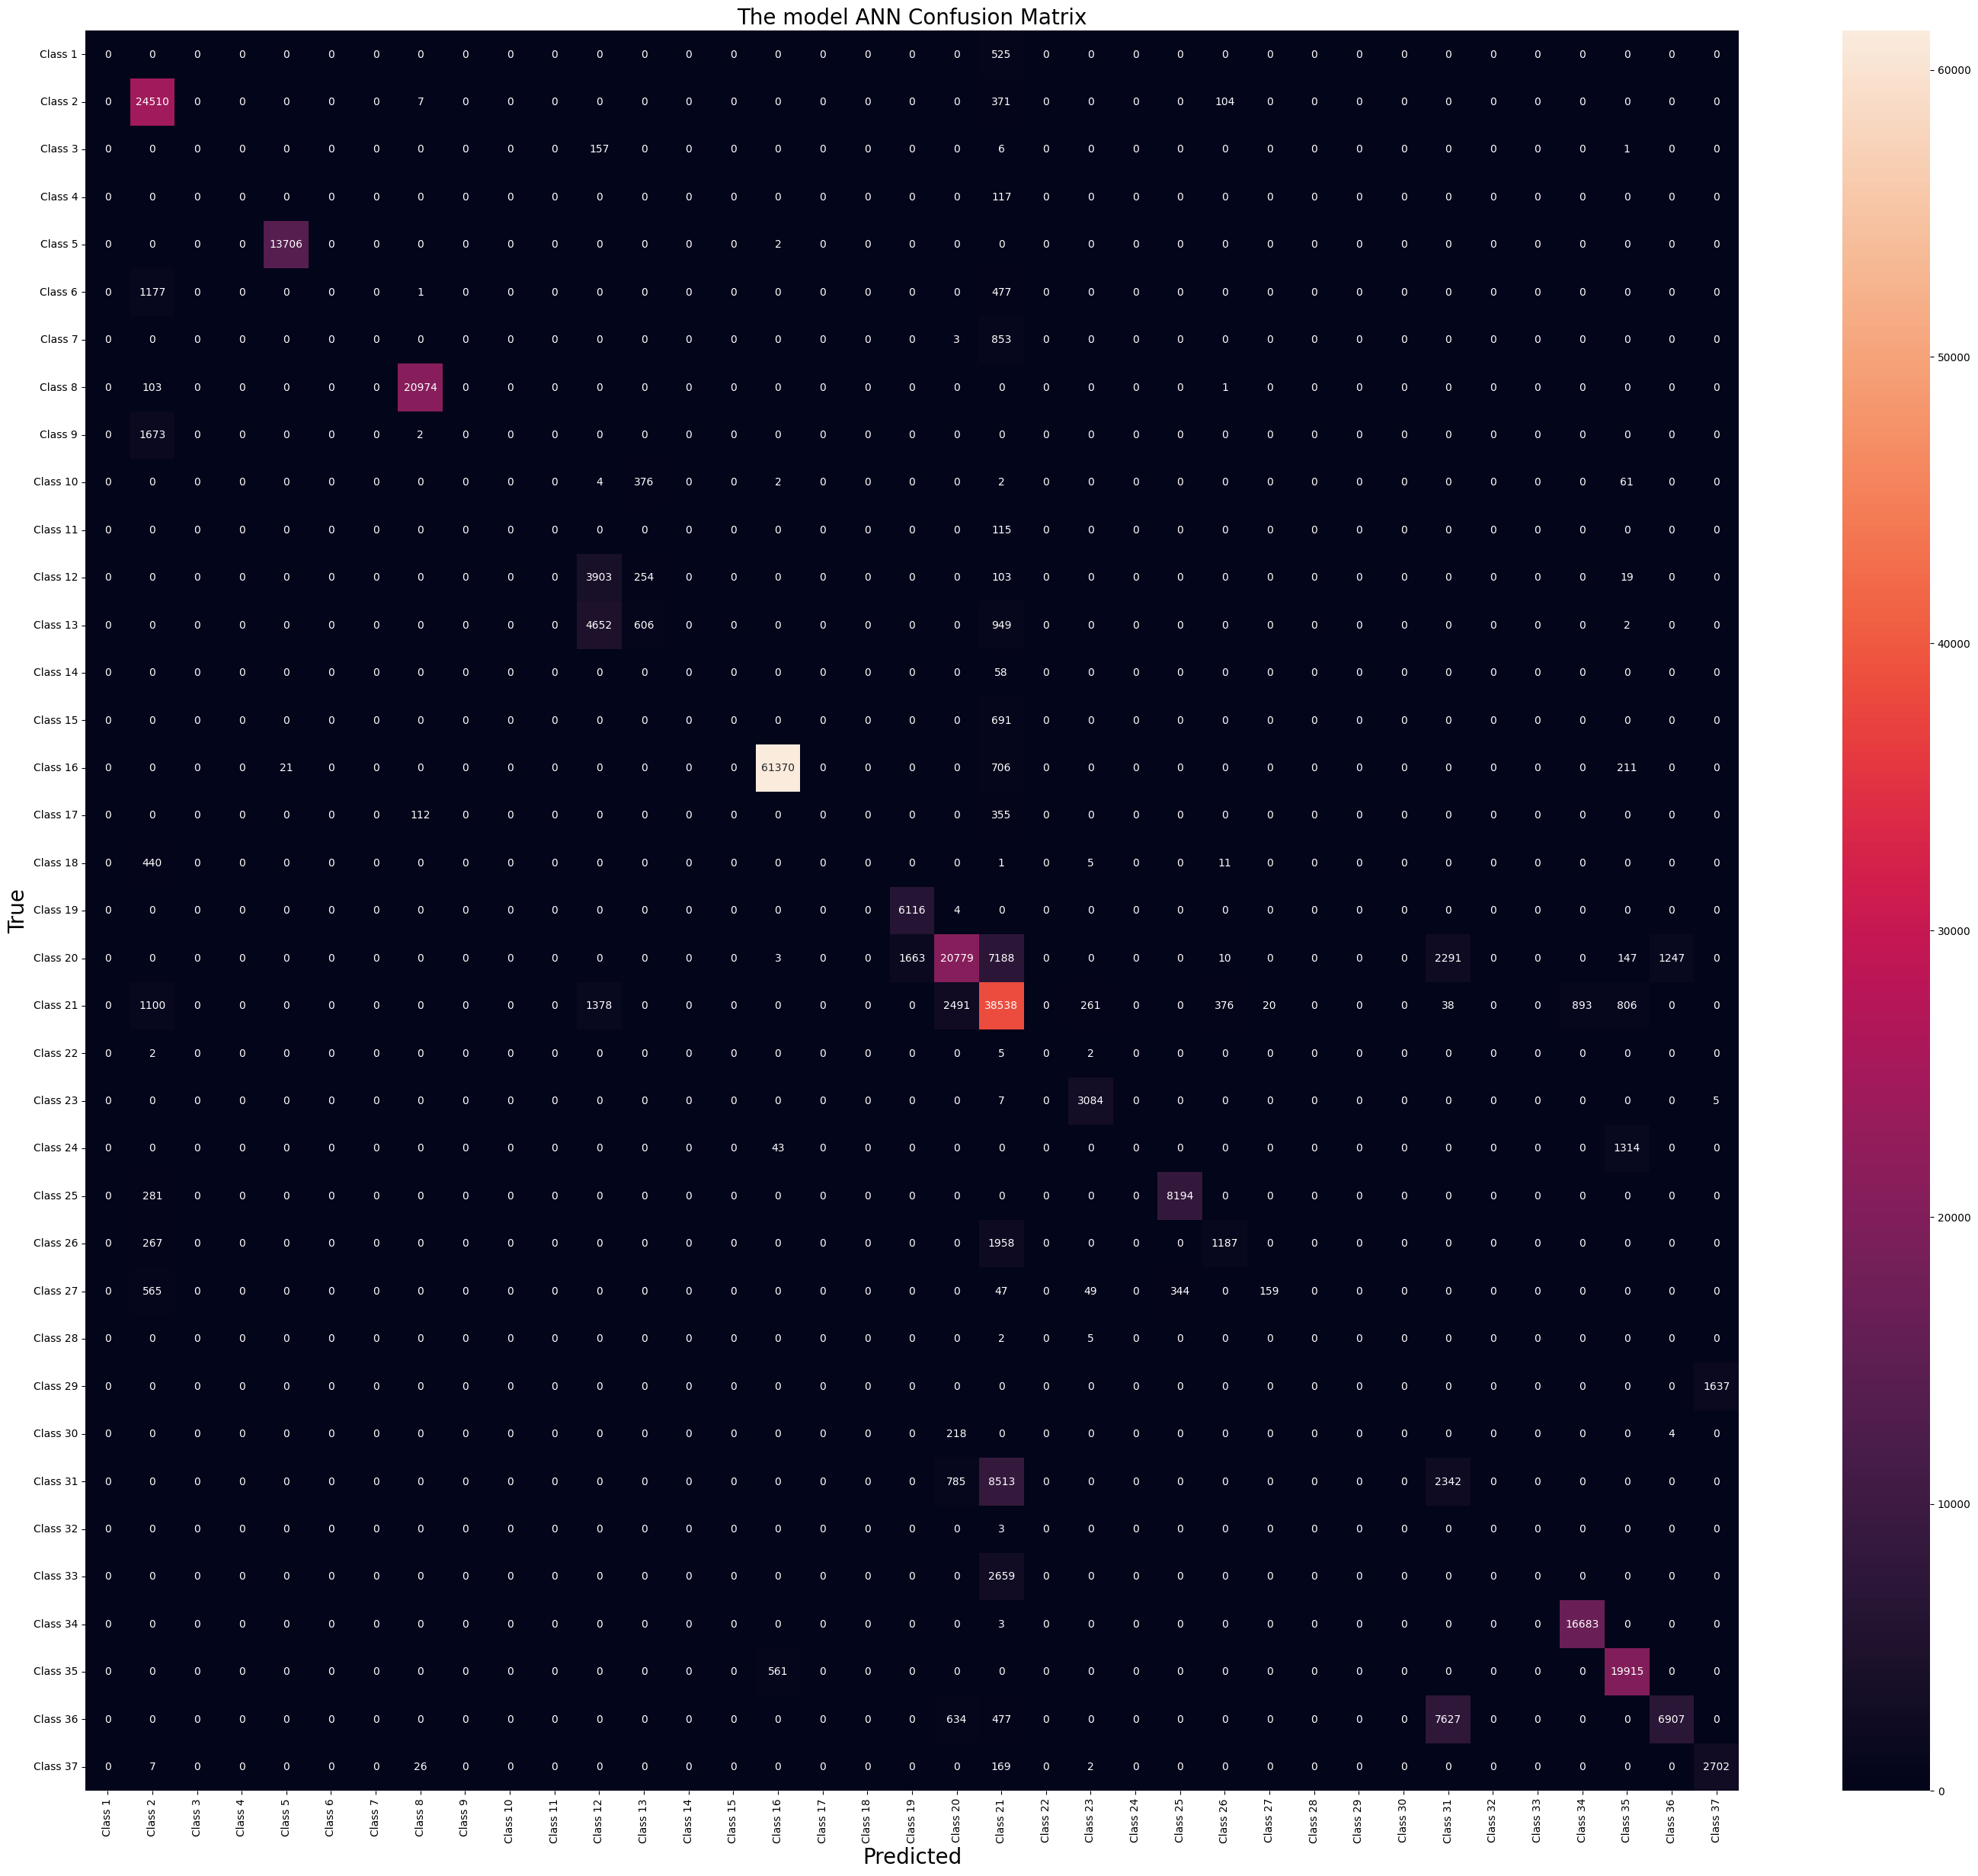

In [60]:
con_matrix(Ay_test_class, Ay_pred_class,"ANN")

In [61]:
print(classification_report(Ay_test_class, Ay_pred_class))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       525
           2       0.81      0.98      0.89     24992
           3       0.00      0.00      0.00       164
           4       0.00      0.00      0.00       117
           5       1.00      1.00      1.00     13708
           6       0.00      0.00      0.00      1655
           7       0.00      0.00      0.00       856
           8       0.99      1.00      0.99     21078
           9       0.00      0.00      0.00      1675
          10       0.00      0.00      0.00       445
          11       0.00      0.00      0.00       115
          12       0.39      0.91      0.54      4279
          13       0.49      0.10      0.16      6209
          14       0.00      0.00      0.00        58
          15       0.00      0.00      0.00       691
          16       0.99      0.98      0.99     62308
          17       0.00      0.00      0.00       467
          18       0.00    

In [62]:
scores = ann_model.evaluate(AX_test, Ay_test, verbose=0)
print('Test data loss:', scores[0])
print('Test accuracy:', scores[1])

Test data loss: 0.5810660719871521
Test accuracy: 0.800131618976593


##TabNet

TabNet is a deep tabular data learning architecture that uses sequential attention to choose which features to reason from at each decision step.

The TabNet encoder is composed of a feature transformer, an attentive transformer and feature masking. A split block divides the processed representation to be used by the attentive transformer of the subsequent step as well as for the overall output. For each step, the feature selection mask provides interpretable information about the model’s functionality, and the masks can be aggregated to obtain global feature important attribution. The TabNet decoder is composed of a feature transformer block at each step.

In the feature transformer block, a 4-layer network is used, where 2 are shared across all decision steps and 2 are decision step-dependent. Each layer is composed of a fully-connected (FC) layer, BN and GLU nonlinearity. An attentive transformer block example – a single layer mapping is modulated with a prior scale information which aggregates how much each feature has been used before the current decision step. sparsemax is used for normalization of the coefficients, resulting in sparse selection of the salient features.

Link: https://paperswithcode.com/method/tabnet

In [63]:
!pip install pytorch_tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.1+cu118 requires torch==2.0.0, but you have torch 1.13.1 whi

In [64]:
from pytorch_tabnet.tab_model import TabNetClassifier

import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [65]:
n_total = len(X_train)

train_indices, valid_indices = train_test_split(
    range(n_total), test_size=0.3, random_state=0)

In [66]:
nt_total = len(X_test)
test_indices = [i for i in range(nt_total)]

In [67]:
TX_train = X_train.values[train_indices]
Ty_train = y_train.values[train_indices]

TX_valid = X_train.values[valid_indices]
Ty_valid = y_train.values[valid_indices]

TX_test = X_test.values[test_indices]
Ty_test = y_test.values[test_indices]

The learning rate is initially set to, lr = 0.020

After 20 epochs, a decay rate of 0.95 will be applied

The result is simply the product of our learning rate and decay rate 0.02*0.95
In the next block of code, we fit the model to our data. Basically it says the train and validation sets will be evaluated for a total of 30 iterations (epochs).

The patience parameter states that if an improvement in metrics is not observed after 30 consecutive epochs, the model will stop running and the best weights from the best epoch will be loaded.

The batch size of 10000 was selected based on recommendations from TabNet’s paper, where they suggest a batch size of up to 10% of the total data. They also recommend that the virtual batch size is smaller than the batch size and can be evenly divided into the batch size.


In [68]:
clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15
)

In [69]:
from pytorch_tabnet.augmentations import ClassificationSMOTE
aug = ClassificationSMOTE(p=0.2)

clf.fit(
    X_train=TX_train, y_train=Ty_train,
    eval_set=[(TX_train, Ty_train), (TX_valid, Ty_valid)],
    eval_name=['train', 'valid'],
    max_epochs=40, patience=30,
    batch_size=10000, virtual_batch_size=1000,
    augmentations=aug
) 

epoch 0  | loss: 2.18724 | train_accuracy: 0.12679 | valid_accuracy: 0.12641 |  0:00:32s
epoch 1  | loss: 1.34415 | train_accuracy: 0.08363 | valid_accuracy: 0.08387 |  0:00:47s
epoch 2  | loss: 1.15434 | train_accuracy: 0.13044 | valid_accuracy: 0.13103 |  0:01:02s
epoch 3  | loss: 1.09229 | train_accuracy: 0.16122 | valid_accuracy: 0.16116 |  0:01:16s
epoch 4  | loss: 0.98211 | train_accuracy: 0.14772 | valid_accuracy: 0.14829 |  0:01:29s
epoch 5  | loss: 0.93287 | train_accuracy: 0.19812 | valid_accuracy: 0.1977  |  0:01:43s
epoch 6  | loss: 0.93617 | train_accuracy: 0.20912 | valid_accuracy: 0.21001 |  0:01:57s
epoch 7  | loss: 0.88874 | train_accuracy: 0.33034 | valid_accuracy: 0.33048 |  0:02:12s
epoch 8  | loss: 0.87234 | train_accuracy: 0.634   | valid_accuracy: 0.63314 |  0:02:28s
epoch 9  | loss: 0.87726 | train_accuracy: 0.67163 | valid_accuracy: 0.67173 |  0:02:48s
epoch 10 | loss: 0.8688  | train_accuracy: 0.7032  | valid_accuracy: 0.70468 |  0:03:13s
epoch 11 | loss: 0.85

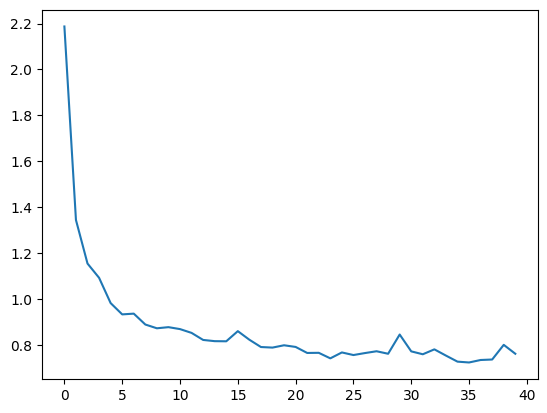

In [70]:
# plot losses
plt.plot(clf.history['loss'])

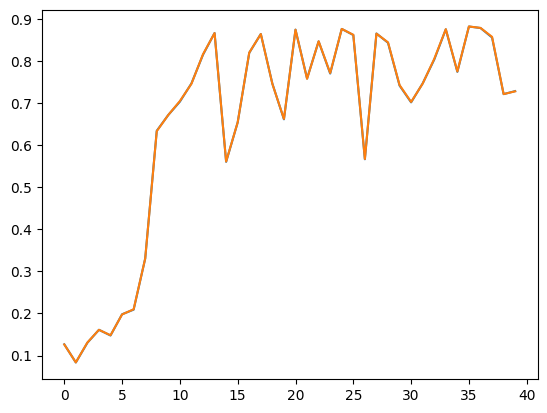

In [71]:
# plot accuracy
plt.plot(clf.history['train_accuracy'])
plt.plot(clf.history['valid_accuracy'])

In [72]:
# or you can simply use the predict method

y_pred = clf.predict(TX_test)
test_acc = accuracy_score(y_pred=y_pred, y_true=Ty_test)
print(f"FINAL TEST SCORE : {test_acc}")

FINAL TEST SCORE : 0.8820475484990875


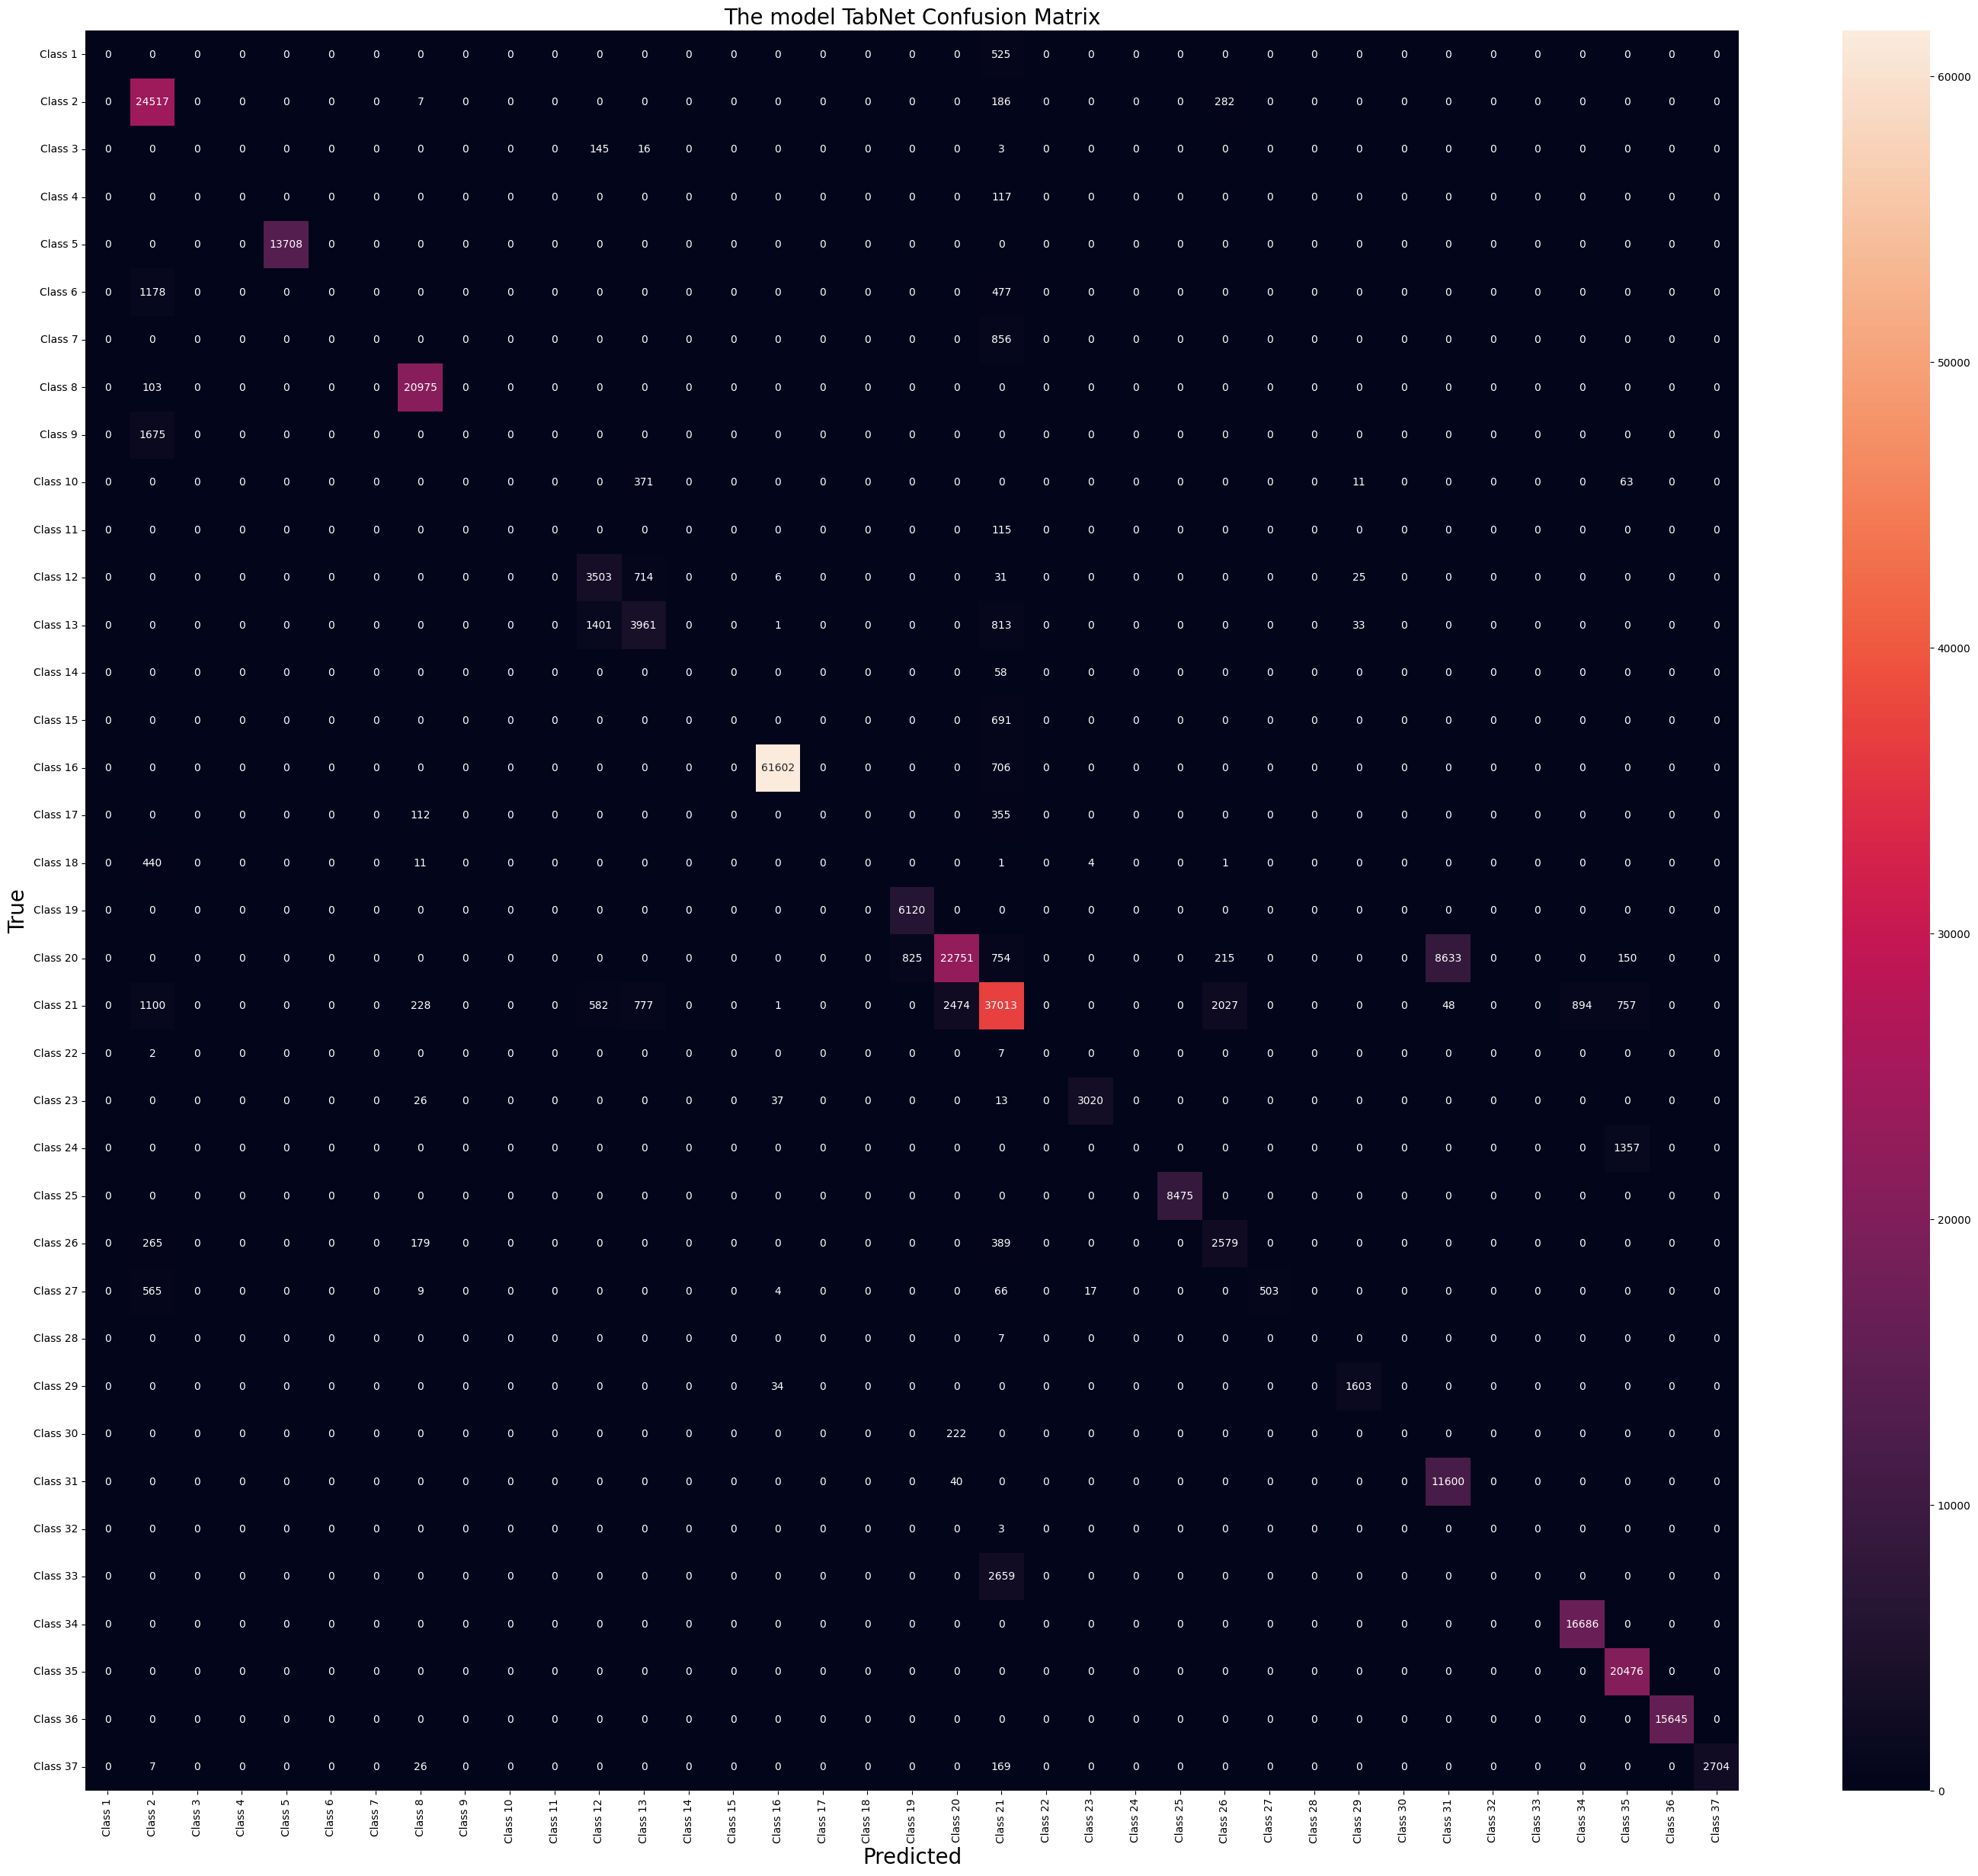

In [73]:
con_matrix(Ty_test, y_pred,"TabNet")

In [74]:
print("\n\tClassificatin report for TabNet\n\n",classification_report(Ty_test,y_pred, target_names=class_names))


	Classificatin report for TabNet

               precision    recall  f1-score   support

     Class 1       0.00      0.00      0.00       525
     Class 2       0.82      0.98      0.89     24992
     Class 3       0.00      0.00      0.00       164
     Class 4       0.00      0.00      0.00       117
     Class 5       1.00      1.00      1.00     13708
     Class 6       0.00      0.00      0.00      1655
     Class 7       0.00      0.00      0.00       856
     Class 8       0.97      1.00      0.98     21078
     Class 9       0.00      0.00      0.00      1675
    Class 10       0.00      0.00      0.00       445
    Class 11       0.00      0.00      0.00       115
    Class 12       0.62      0.82      0.71      4279
    Class 13       0.68      0.64      0.66      6209
    Class 14       0.00      0.00      0.00        58
    Class 15       0.00      0.00      0.00       691
    Class 16       1.00      0.99      0.99     62308
    Class 17       0.00      0.00      0.00  

# Time Series Analysis

In the simplest terms, time-series forecasting is a technique that utilizes historical and current data to predict future values over a period of time or a specific point in the future. By analyzing data that we stored in the past, we can make informed decisions that can guide our business strategy and help us understand future trends.

Link: https://www.timescale.com/blog/what-is-time-series-forecasting/

In [75]:
dates = data[(data['Year'] == 2013 )].groupby(['Incident_Date']).agg({'Incident_Num':['count']})
dates.columns = ['Inc_count']

<Axes: xlabel='Incident_Date'>

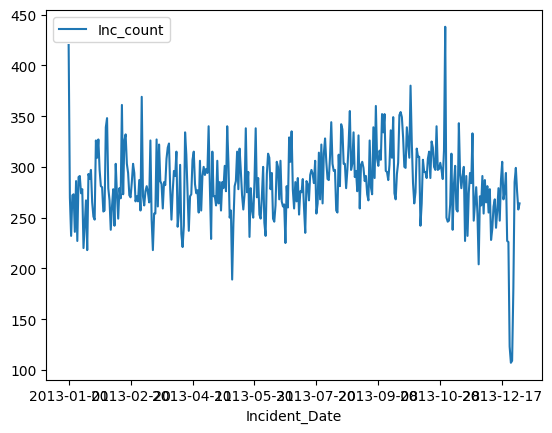

In [76]:
dates.plot()
plt.show()

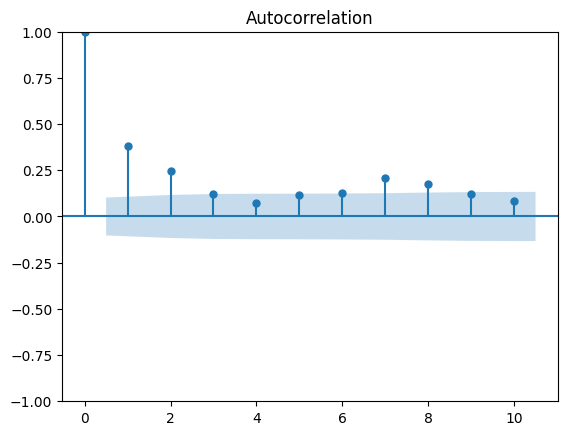

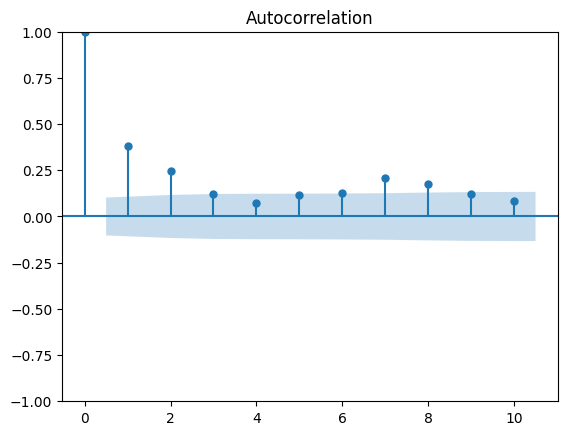

In [77]:
plot_acf(dates, lags = 10)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<Axes: xlabel='Incident_Date'>

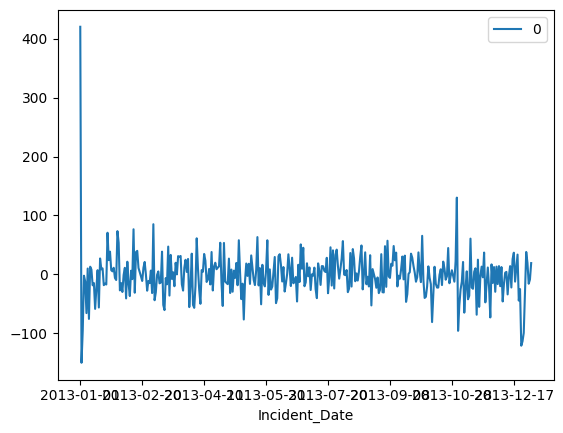

<Axes: ylabel='Density'>

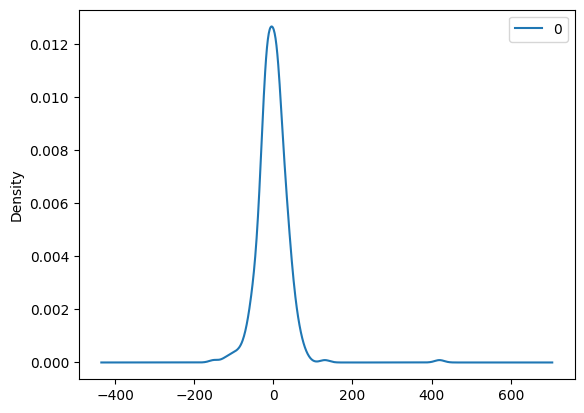

                0
count  365.000000
mean    -1.256255
std     39.603954
min   -149.738504
25%    -19.964804
50%     -2.129922
75%     16.150025
max    420.000000


In [78]:
timeSeries_model = ARIMA(dates, order=(1,1,7))

residuals = pd.DataFrame(timeSeries_model.fit().resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted= 295.426572, expected = 291.000000
predicted= 303.789355, expected = 273.000000
predicted= 294.828121, expected = 267.000000
predicted= 292.898761, expected = 326.000000
predicted= 306.601275, expected = 280.000000
predicted= 301.787199, expected = 273.000000
predicted= 290.515971, expected = 339.000000
predicted= 305.839724, expected = 289.000000
predicted= 301.345266, expected = 360.000000
predicted= 302.333851, expected = 308.000000
predicted= 303.439261, expected = 301.000000
predicted= 295.773922, expected = 316.000000
predicted= 292.206077, expected = 307.000000
predicted= 302.571562, expected = 352.000000
predicted= 302.983483, expected = 334.000000
predicted= 308.244462, expected = 352.000000
predicted= 308.700068, expected = 296.000000
predicted= 297.462112, expected = 295.000000
predicted= 295.747284, expected = 287.000000
predicted= 296.337892, expected = 302.000000
predicted= 305.046689, expected = 336.000000
predicted= 311.619590, expected = 309.000000
predicted=

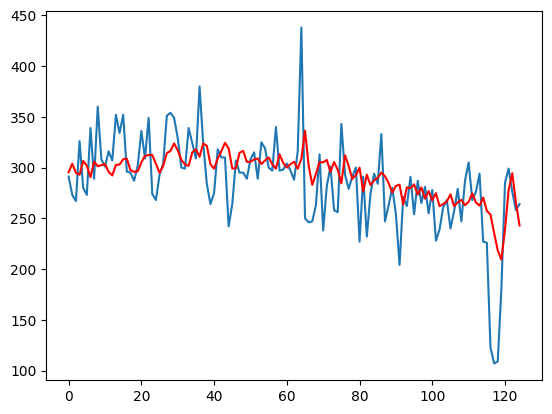

In [79]:
D = dates.values
size = int(len(D) * 0.66)
train, test = D[0:size], D[size:len(D)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,7))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted= %f, expected = %f' %(yhat,obs))
    
error = mean_squared_error(test, predictions)
print(' Test MSE : %3f' %error)


plt.plot(test)
plt.plot(predictions, color= 'red')
plt.show()

In [80]:
rmse_error = np.sqrt(mean_squared_error(test, predictions))
print(' Test RMSE : %3f' %rmse_error)

 Test RMSE : 37.338496
